# Marketing Expense Analysis

In the following project I will be analyzing data from Yandex.Afisha to assist in optimizing marketing expenses. I will be assessing a variety of variables related to product usage, user purchasing patterns, and marketing expenses. 

**Action Plan**

As always, the first step in this project will be too examine the supplied data and resolve any data irregularities that present themselves. From there my project will be composed of three segments:

1. Product
    - total number of users daily, weekly, and monthly 
    - usage sessions / day
    - session length
    - retention rate
    
2. Sales
    - total time to first purchase
    - order quantity in a given period
    - average purchase size
    - LTV
    
3. Marketing
    - total expenditure (overall/ per source/ over time)
    - Customer aquisition cost per source
    - ROI

## Initialization

In [ ]:
# loading necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# loading the 3 supplied CSV files

visit_data = pd.read_csv('/datasets/visits_log_us.csv')

orders_data = pd.read_csv('/datasets/orders_log_us.csv')

costs_data = pd.read_csv('/datasets/costs_us.csv')

In [ ]:
# investigate visit_data for irregularities

visit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [ ]:
visit_data.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


### Visit Data First Glance

The inital pass at the `visit_data` df shows us that the columns are as follows:

- `Uid` — user's unique identifier
- `Device` — user's device
- `Start Ts` — session start date and time
- `End Ts` — session end date and time
- `Source Id` — identifier of the ad source the user came from

Additionally, the `Start Ts` and `End Ts` columns are the incorrect data type (need to be 'datetime'). I will also convert `Device` to the 'category' datatype for optimization. Finally the columns will need to be renamed in snake_case to make later analysis easier. 

In [ ]:
visit_data.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [ ]:
visit_data['end_ts'] = pd.to_datetime(visit_data['end_ts'], format = '%Y-%m-%d %H:%M')

visit_data['start_ts'] = pd.to_datetime(visit_data['start_ts'], format = '%Y-%m-%d %H:%M')

In [ ]:
visit_data['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

In [ ]:
visit_data['device'] = visit_data['device'].astype('category')

In [ ]:
visit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


**Visit_data optimization achieved!**

### Orders Data First Glance

The orders_data columns are:

- Uid — unique identifier of the user making an order
- Buy Ts — order date and time
- Revenue — Yandex.Afisha's revenue from the order

Column names need to be corrected, `Buy Ts` needs to be converted to datetime. 

In [ ]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [ ]:
orders_data.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [ ]:
orders_data.columns = ['buy_ts', 'revenue', 'uid']

In [ ]:
orders_data['buy_ts'] = pd.to_datetime(orders_data['buy_ts'], format = '%Y-%m-%d %H:%M')

In [ ]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


**orders_data optimzation achieved!**

### Costs Data First Glance

The columns in `cost_data` are:

- source_id — ad source identifier
- dt — date
- costs — expenses on this ad source on this day

Column names are in snake_case, all that needs to be corrected is the `dt` column datatype.

In [ ]:
costs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [ ]:
costs_data.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [ ]:
costs_data['dt'] = pd.to_datetime(costs_data['dt'], format = '%Y-%m-%d')

In [ ]:
costs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


**costs_data optimization complete!**

## Product Analysis

Now that my initial data optimization is complete I can dive in to the analysis. The first section will be on product usage trends. I am looking for the following:

- total number of users daily, weekly, and monthly
- usage sessions / day
- session length
- retention rate

In [ ]:
# creating daily, weekly, and monthly session columns

visit_data['visit_year'] = visit_data['start_ts'].dt.year

visit_data['visit_month'] = visit_data['start_ts'].astype('datetime64[M]')

visit_data['visit_week'] = visit_data['start_ts'].astype('datetime64[W]')

visit_data['visit_date'] = visit_data['start_ts'].dt.date

In [ ]:
visit_data.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27


In [ ]:
dau_total = visit_data.groupby('visit_date').agg({'uid':'nunique'}).mean()

print('Average DAU for the entire period:', int(dau_total), 'users')

Average DAU for the entire period: 907 users


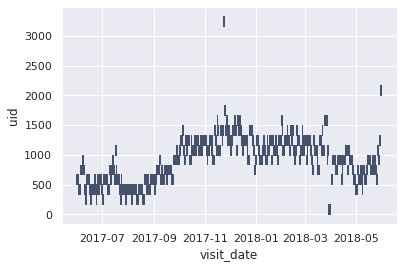

In [ ]:
dau_pivot = visit_data.pivot_table(
    index = 'visit_date',
    values = 'uid',
    aggfunc = 'nunique'
).reset_index()

sns.set(style="darkgrid")
sns.histplot(data=dau_pivot, x="visit_date", y='uid', bins=20)
plt.show()

#dau_pivot.hist(bins = 50, figsize = (8,7))
#plt.title('Daily Active Users')
#plt.ylabel('Total Users')
#plt.xlabel('Frequency')

In [ ]:
dau_pivot.head()

,visit_date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


In [ ]:
wau_total = visit_data.groupby(['visit_year', 'visit_week']).agg({'uid':'nunique'}).mean()

print('WAU for the entire period:', int(wau_total), 'users')

WAU for the entire period: 5621 users


Text(0, 0.5, 'Total Active Users')

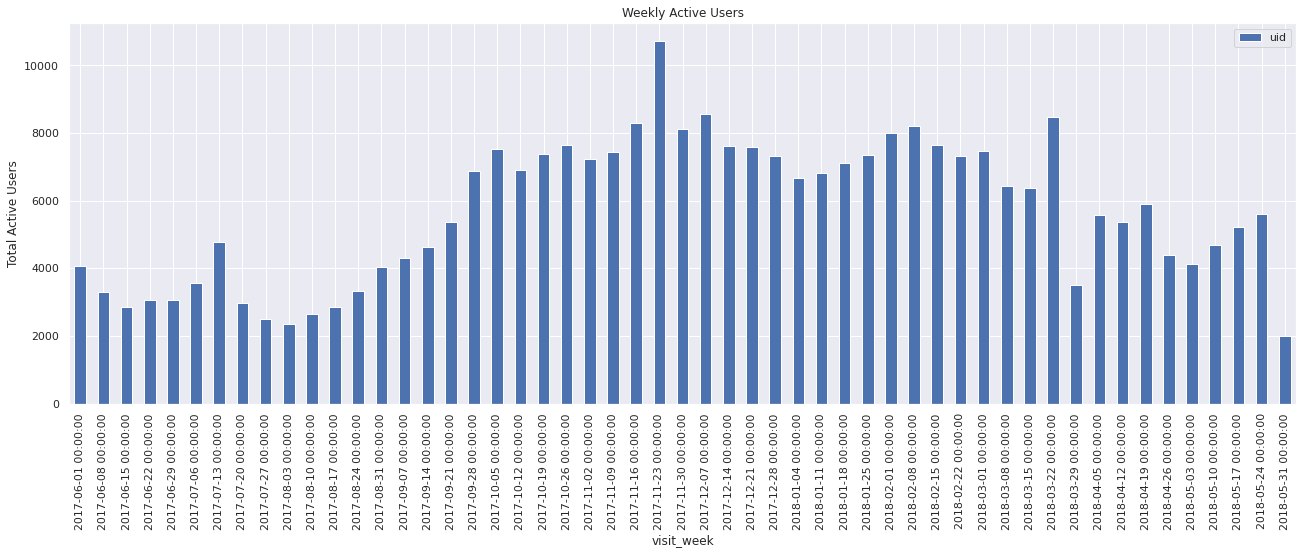

In [ ]:
wau_pivot = visit_data.pivot_table(
    index = 'visit_week',
    values = 'uid',
    aggfunc = 'nunique'
)

wau_pivot.plot(kind = 'bar', grid = True, figsize = (22,7))
plt.title('Weekly Active Users')
plt.ylabel('Total Active Users')

In [ ]:
mau_total = visit_data.groupby(['visit_year', 'visit_month']).agg({'uid':'nunique'}).mean()

print('MAU for the entire period:', int(mau_total), 'users')

MAU for the entire period: 23228 users


Text(0, 0.5, 'Active Users')

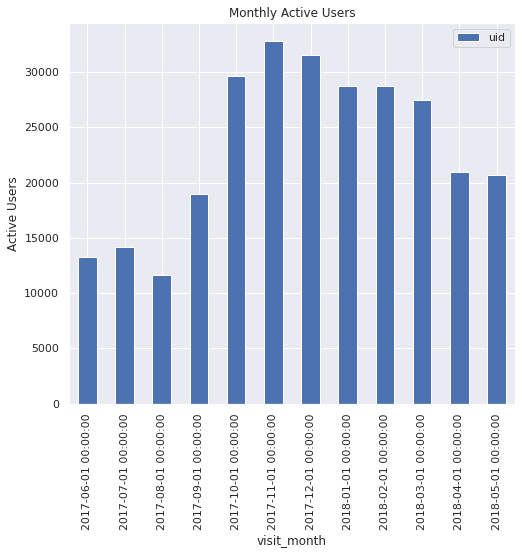

In [ ]:
mau_pivot = visit_data.pivot_table(
    index = 'visit_month',
    values = 'uid',
    aggfunc = 'nunique'
)

mau_pivot.plot(kind = 'bar', grid = True, figsize = (8,7))
plt.title('Monthly Active Users')
plt.ylabel('Active Users')

### Calculating Total Visits Per Day and Session Length

In [ ]:
visits_per_day = visit_data.groupby('visit_date').agg({'uid':'count'}).reset_index()
visits_per_day.columns = ['visit_date','total_visits']
visits_per_day.head()

,visit_date,total_visits
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893


In [ ]:
unique_visits = visit_data.groupby('visit_date').agg({'uid':'nunique'}).reset_index()
unique_visits.columns = ['visit_date','unique_visits']
unique_visits.head()

,visit_date,unique_visits
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


In [ ]:
visits_per_day = visits_per_day.merge(unique_visits, on = 'visit_date')
visits_per_day['unique_visits_daily'] = visits_per_day['total_visits'] / visits_per_day['unique_visits']
visits_per_day.head()

,visit_date,total_visits,unique_visits,unique_visits_daily
0,2017-06-01,664,605,1.097521
1,2017-06-02,658,608,1.082237
2,2017-06-03,477,445,1.071910
3,2017-06-04,510,476,1.071429
4,2017-06-05,893,820,1.089024


Text(0, 0.5, 'Frequency')

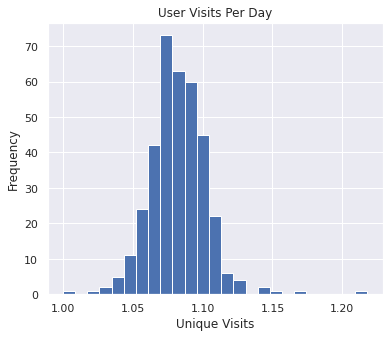

In [ ]:
vpd_pivot = visits_per_day.pivot_table(
    index = 'visit_date',
    values = 'unique_visits_daily',
    aggfunc = 'mean'
)

vpd_pivot.hist(bins = 25, figsize = (6,5))
plt.title('User Visits Per Day')
plt.xlabel('Unique Visits')
plt.ylabel('Frequency')

In [ ]:
visit_data['visit_length'] = (visit_data['end_ts'] - visit_data['start_ts']).dt.seconds

In [ ]:
len(visit_data.loc[visit_data['visit_length'] == 0]) / len(visit_data)

0.0995937673900946

In [ ]:
real_visits = visit_data.query('visit_length > 0')

In [ ]:
visits = real_visits['visit_length'].mode()
visits_zero = visit_data['visit_length'].mode()

print(visits)

print(visits_zero)

0    60
dtype: int64
0    60
dtype: int64


### Progress Notes

We've now reached a point where I have answered 3 of the 4 points I set out to analyize. My findings so far are:

**Average Monthly Active Users:** 23228

**Average Weekly Active Users:** 5621

**Average Daily Active Users:** 907

**Average Visits Per Day:** The vast majority of users visit once per day. The most user visit per day is around 5 times. 

**Average Visit Length:** 60 seconds

Now all that remains is to find the retention rate. 

### Product Analysis - Retention Rates

In [ ]:
first_visit_date = visit_data.groupby(['uid'])['visit_date'].min()

first_visit_date.name = 'first_visit_date'

visit_data = visit_data.join(first_visit_date, on = 'uid')

In [ ]:
visit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   device            359400 non-null  category      
 1   end_ts            359400 non-null  datetime64[ns]
 2   source_id         359400 non-null  int64         
 3   start_ts          359400 non-null  datetime64[ns]
 4   uid               359400 non-null  uint64        
 5   visit_year        359400 non-null  int64         
 6   visit_month       359400 non-null  datetime64[ns]
 7   visit_week        359400 non-null  datetime64[ns]
 8   visit_date        359400 non-null  object        
 9   visit_length      359400 non-null  int64         
 10  first_visit_date  359400 non-null  object        
dtypes: category(1), datetime64[ns](4), int64(3), object(2), uint64(1)
memory usage: 27.8+ MB


In [ ]:
visit_data.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,visit_length,first_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27


In [ ]:
visit_data['visit_date'] = pd.to_datetime(visit_data['visit_date'], format = '%Y-%m-%d')

visit_data['first_visit_date'] = pd.to_datetime(visit_data['first_visit_date'], format = '%Y-%m-%d')

In [ ]:
visit_data['activity_month'] = pd.to_datetime(visit_data['visit_date'], unit='m') - pd.to_timedelta(visit_data['visit_date'].dt.month, unit='m') 


In [ ]:
visit_data['first_visit_month'] = visit_data['first_visit_date'].astype('datetime64[M]')

In [ ]:
visit_data.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,visit_length,first_visit_date,activity_month,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20,2017-12-19 23:48:00,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19,2018-02-18 23:58:00,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,2017-06-30 23:53:00,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09,2018-05-19 23:55:00,2018-03-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27,2017-12-26 23:48:00,2017-12-01


In [ ]:
visit_data['cohort_lifetime'] = (visit_data['activity_month'] - visit_data['first_visit_month'])

visit_data['cohort_lifetime'] = visit_data['cohort_lifetime'] / np.timedelta64(1, 'M')

visit_data['cohort_lifetime'] = visit_data['cohort_lifetime'].astype(int)

In [ ]:
cohorts = visit_data.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [ ]:
cohorts_pivot = visit_data.pivot_table(
    index = 'first_visit_month',
    columns = 'cohort_lifetime',
    values = 'uid',
    aggfunc = 'nunique'
).fillna('')

In [ ]:
cohorts_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,13259.0,1007.0,713.0,814.0,909.0,947.0,809.0,752.0,719.0,659.0,552.0,585.0
2017-07-01,13140.0,718.0,698.0,716.0,789.0,623.0,590.0,643.0,488.0,382.0,354.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,438.0,411.0,366.0,289.0,259.0,,
2017-09-01,16704.0,1363.0,1175.0,827.0,658.0,672.0,557.0,411.0,367.0,,,
2017-10-01,25977.0,2042.0,1357.0,981.0,988.0,780.0,568.0,514.0,,,,
2017-11-01,27248.0,2013.0,1202.0,1113.0,876.0,653.0,565.0,,,,,
2017-12-01,25268.0,1374.0,1042.0,733.0,527.0,464.0,,,,,,
2018-01-01,22624.0,1415.0,842.0,549.0,446.0,,,,,,,
2018-02-01,22197.0,1085.0,584.0,413.0,,,,,,,,


In [ ]:
cohorts.head()

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1007
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


In [ ]:
initial_user_count = cohorts[cohorts['cohort_lifetime'] == 0][
    ['first_visit_month', 'uid']
]

initial_user_count.head()

,first_visit_month,uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


In [ ]:
initial_user_count = initial_user_count.rename(columns = {'uid':'cohort_users'})

In [ ]:
cohorts = cohorts.merge(initial_user_count, on = 'first_visit_month')

In [ ]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

In [ ]:
retention_pivot = cohorts.pivot_table(
    index = 'first_visit_month',
    columns = 'cohort_lifetime',
    values = 'retention',
    aggfunc = 'sum'
)

<AxesSubplot:title={'center':'Cohort Retention Rate'}, xlabel='cohort_lifetime', ylabel='first_visit_month'>

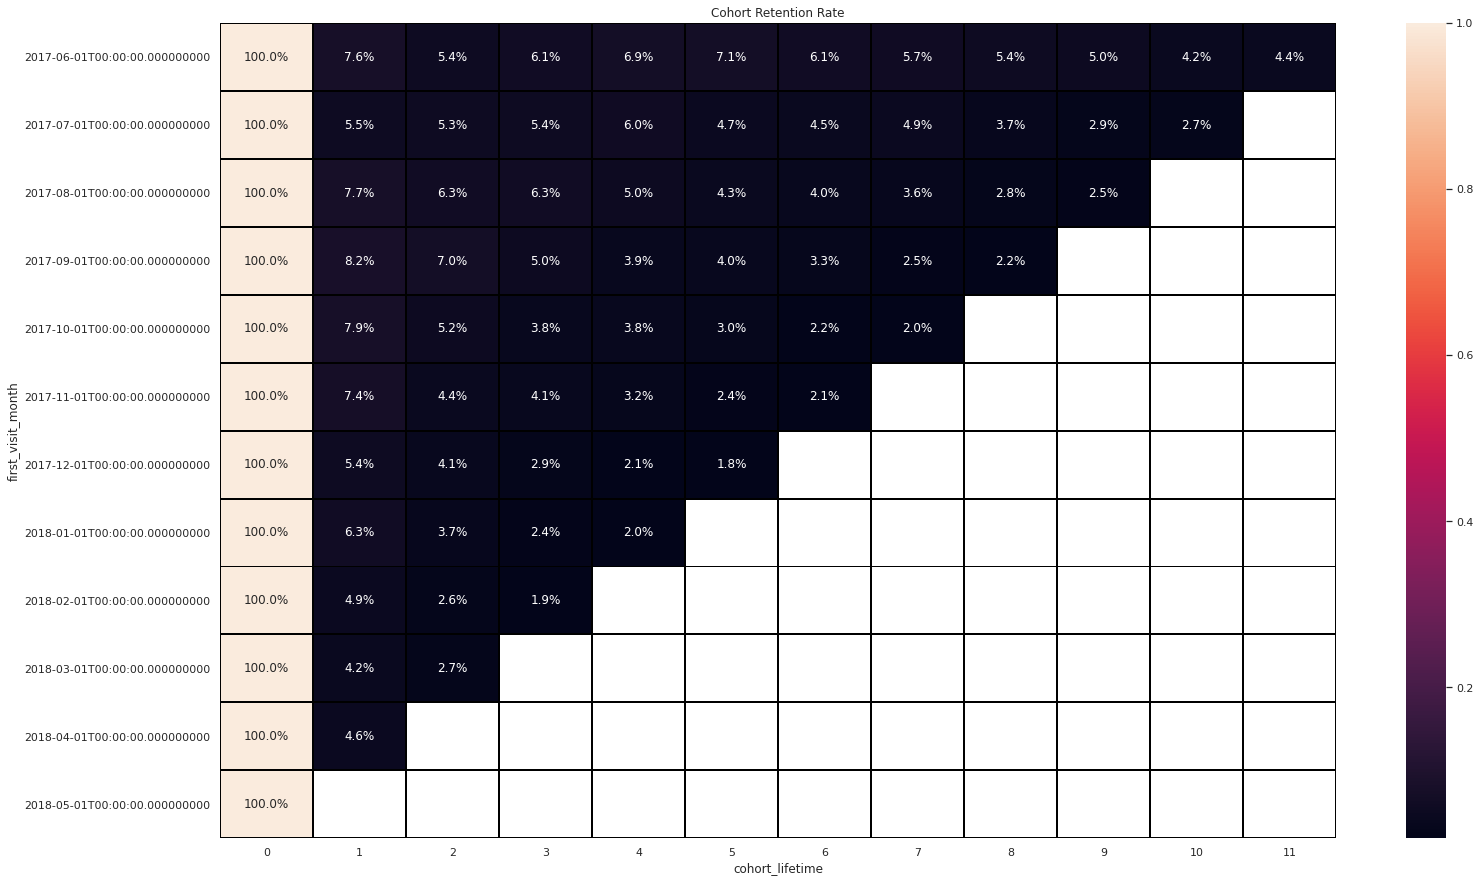

In [ ]:
sns.set(style = 'white')
plt.figure(figsize = (25,15))
plt.title('Cohort Retention Rate')
sns.heatmap(
    retention_pivot, annot = True, fmt = '.1%', linewidths = 1, linecolor = 'black'
)

#### Retention Rates Conclusion

From the heatmap above we can see that user retention is on the lower end though not terrible. There is an uptick in retention for cohort 0 in June though that is not consistent with other cohorts. The forth cohort had the best retention rate for the first month at 8.2%. Interestingly the retention rate for the first cohort remains at 4.4% even after 12 months while the following cohorts drop to between 2-3% quickly. This could indicate a difference in the user behavior of early adopters or another issue that later cohorts experieced. 

## Sales Analysis

In this portion of my notebook I will be investigating the following points from the `orders_data` dataframe:

- total time to first purchase
- order quantity in a given period
- average purchase size
- LTV

In [ ]:
#pulling up the assorted dataframes to keep them fresh

orders_data.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [ ]:
visit_data.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,visit_length,first_visit_date,activity_month,first_visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20,2017-12-19 23:48:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19,2018-02-18 23:58:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,2017-06-30 23:53:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09,2018-05-19 23:55:00,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27,2017-12-26 23:48:00,2017-12-01,0


In [ ]:
# adding a 'buyer' column to assit in merging order df with visits df

orders_data['buyer'] = 'Yes'

In [ ]:
orders_data_count = orders_data.groupby(['uid'])['buyer'].count().reset_index()
orders_data_count.columns = ['uid', 'order_count']
orders_data_count.head()

,uid,order_count
0,313578113262317,1
1,1575281904278712,2
2,2429014661409475,1
3,2464366381792757,1
4,2551852515556206,2


In [ ]:
# Locate first source by user id so we can see where the potential customer came from

first_visit_source = visit_data.sort_values('start_ts').groupby(['uid'])['source_id'].first().reset_index()
first_visit_source.head()

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5


In [ ]:
# Join actual purchasing customers with our visits tables

buyers = pd.merge(first_visit_source, orders_data_count, how='inner', on='uid', validate='1:m')
buyers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uid          36523 non-null  uint64
 1   source_id    36523 non-null  int64 
 2   order_count  36523 non-null  int64 
dtypes: int64(2), uint64(1)
memory usage: 1.1 MB


In [ ]:
buyers.head()

,uid,source_id,order_count
0,313578113262317,2,1
1,1575281904278712,10,2
2,2429014661409475,3,1
3,2464366381792757,5,1
4,2551852515556206,5,2


In [ ]:
orders_data.head()

,buy_ts,revenue,uid,buyer
0,2017-06-01 00:10:00,17.00,10329302124590727494,Yes
1,2017-06-01 00:25:00,0.55,11627257723692907447,Yes
2,2017-06-01 00:27:00,0.37,17903680561304213844,Yes
3,2017-06-01 00:29:00,0.55,16109239769442553005,Yes
4,2017-06-01 07:58:00,0.37,14200605875248379450,Yes


In [ ]:
# find first purchase date in orders_data

first_purchase_date = orders_data.groupby(['uid'])['buy_ts'].min()
first_purchase_date.name = 'first_purchase_date'
orders_data_mod = pd.merge(orders_data, first_purchase_date, how = 'left', on='uid', validate = 'm:1')

In [ ]:
orders_data_mod.columns = ['purchase_date', 'revenue', 'uid', 'buyer', 'first_purchase_date']

In [ ]:
orders_data_mod = pd.merge(orders_data_mod, buyers, how = 'inner', on = 'uid')

In [ ]:
orders_data_mod.head()

,purchase_date,revenue,uid,buyer,first_purchase_date,source_id,order_count
0,2017-06-01 00:10:00,17.00,10329302124590727494,Yes,2017-06-01 00:10:00,1,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,Yes,2017-06-01 00:25:00,2,1
2,2017-06-01 00:27:00,0.37,17903680561304213844,Yes,2017-06-01 00:27:00,2,1
3,2017-06-01 00:29:00,0.55,16109239769442553005,Yes,2017-06-01 00:29:00,2,1
4,2017-06-01 07:58:00,0.37,14200605875248379450,Yes,2017-06-01 07:58:00,3,1


In [ ]:
# creating purchase month from purchase date

orders_data_mod['purchase_month'] = orders_data_mod['purchase_date'].astype('datetime64[M]')

In [ ]:
# creating first purchase month from first purchase date

orders_data_mod['first_purchase_month'] = orders_data_mod['first_purchase_date'].astype('datetime64[M]')

In [ ]:
orders_data_mod.head()

,purchase_date,revenue,uid,buyer,first_purchase_date,source_id,order_count,purchase_month,first_purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,Yes,2017-06-01 00:10:00,1,1,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,Yes,2017-06-01 00:25:00,2,1,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,Yes,2017-06-01 00:27:00,2,1,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,Yes,2017-06-01 00:29:00,2,1,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,Yes,2017-06-01 07:58:00,3,1,2017-06-01,2017-06-01


In [ ]:
orders_data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   purchase_date         50415 non-null  datetime64[ns]
 1   revenue               50415 non-null  float64       
 2   uid                   50415 non-null  uint64        
 3   buyer                 50415 non-null  object        
 4   first_purchase_date   50415 non-null  datetime64[ns]
 5   source_id             50415 non-null  int64         
 6   order_count           50415 non-null  int64         
 7   purchase_month        50415 non-null  datetime64[ns]
 8   first_purchase_month  50415 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(2), object(1), uint64(1)
memory usage: 3.8+ MB


In [ ]:
visit_data.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,visit_length,first_visit_date,activity_month,first_visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20,2017-12-19 23:48:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19,2018-02-18 23:58:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01,2017-06-30 23:53:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09,2018-05-19 23:55:00,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27,2017-12-26 23:48:00,2017-12-01,0


In [ ]:
first_visit_date = visit_data.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_visit_date.columns = ['uid','first_visit_date']
first_visit_date.head()

,uid,first_visit_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [ ]:
orders_data_mod = pd.merge(orders_data_mod, first_visit_date, how = 'inner', on = 'uid')

In [ ]:
orders_data_mod.head()

,purchase_date,revenue,uid,buyer,first_purchase_date,source_id,order_count,purchase_month,first_purchase_month,first_visit_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,Yes,2017-06-01 00:10:00,1,1,2017-06-01,2017-06-01,2017-06-01 00:09:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,Yes,2017-06-01 00:25:00,2,1,2017-06-01,2017-06-01,2017-06-01 00:14:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,Yes,2017-06-01 00:27:00,2,1,2017-06-01,2017-06-01,2017-06-01 00:25:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,Yes,2017-06-01 00:29:00,2,1,2017-06-01,2017-06-01,2017-06-01 00:14:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,Yes,2017-06-01 07:58:00,3,1,2017-06-01,2017-06-01,2017-06-01 07:31:00


In [ ]:
orders_data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50415 entries, 0 to 50414
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   purchase_date         50415 non-null  datetime64[ns]
 1   revenue               50415 non-null  float64       
 2   uid                   50415 non-null  uint64        
 3   buyer                 50415 non-null  object        
 4   first_purchase_date   50415 non-null  datetime64[ns]
 5   source_id             50415 non-null  int64         
 6   order_count           50415 non-null  int64         
 7   purchase_month        50415 non-null  datetime64[ns]
 8   first_purchase_month  50415 non-null  datetime64[ns]
 9   first_visit_date      50415 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(2), object(1), uint64(1)
memory usage: 4.2+ MB


### Time Between First Visit and First Purchase

In [ ]:
orders_data_mod['purchase_delay'] = (orders_data_mod['first_purchase_date'] - orders_data_mod['first_visit_date']).dt.days

In [ ]:
purchase_delay_pivot = orders_data_mod.pivot_table(
    index = 'purchase_month',
    values = 'purchase_delay',
    aggfunc = 'mean'
)

Text(0, 0.5, 'Frequency')

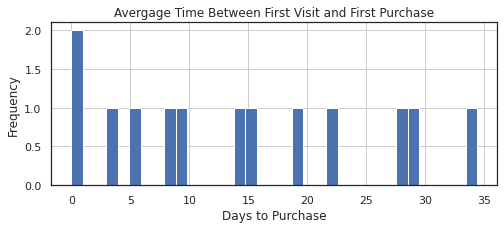

In [ ]:
purchase_delay_pivot.hist(bins = 35, figsize = (8,3))
plt.title('Avergage Time Between First Visit and First Purchase')
plt.xlabel('Days to Purchase')
plt.ylabel('Frequency')

### When Do People Start Buying Conclusion

After isolating the first purchase dates and first visit dates of users in the `buyers` df I found that the most users made their first purchase within 9 days of their first visit, though for users who waited past that 9 day period they had a spread of delays between 14 and 34 days. 

### Life Time Orders by Cohort

Using the `order_count` column in `customer_df` I can create cohorts based on purchase month and then analyze how many orders members of each cohort made of the course of their cohort lifetime.  

In [ ]:
#building order total cohorts

orders = orders_data_mod.groupby(['uid']).agg({'purchase_month':'min'}).reset_index()
orders.columns = ['uid', 'first_purchase_month']
orders.head()

,uid,first_purchase_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [ ]:
order_cohort_sizes = orders.groupby(['first_purchase_month']).agg({'uid':'nunique'}).reset_index()
order_cohort_sizes.columns = ['first_purchase_month', 'n_buyers']
order_cohort_sizes.head()

,first_purchase_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [ ]:
order_cohorts = orders_data_mod.groupby(
    ['first_purchase_month', 'purchase_month']
).agg({'order_count':'sum'}).reset_index()

order_cohorts.head(10)

,first_purchase_month,purchase_month,order_count
0,2017-06-01,2017-06-01,13796
1,2017-06-01,2017-07-01,20425
2,2017-06-01,2017-08-01,21627
3,2017-06-01,2017-09-01,28163
4,2017-06-01,2017-10-01,30798
5,2017-06-01,2017-11-01,21527
6,2017-06-01,2017-12-01,32027
7,2017-06-01,2018-01-01,22218
8,2017-06-01,2018-02-01,27197
9,2017-06-01,2018-03-01,17215


In [ ]:
# building a total order report

order_report = pd.merge(order_cohort_sizes, orders_data_mod, on = ['first_purchase_month'])

order_report['age'] = (
    order_report['purchase_month'] - order_report['first_purchase_month']
) / np.timedelta64(1, 'M')
order_report['age'] = order_report['age'].round().astype('int')

In [ ]:
order_report_pivot = order_report.pivot_table(
    index = 'first_purchase_month',
    columns = 'age',
    values = 'order_count',
    aggfunc = 'mean'
).cumsum(axis = 1)

order_report_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,5.860663,121.256143,245.549246,370.164291,475.636893,574.384600,690.424455,818.114110,946.401846,1058.918186,1149.959852,1191.366829
2017-07-01,2.181610,32.351610,82.701610,112.547764,130.144986,196.352303,255.647385,272.947385,286.723247,299.889914,346.927650,NaN
2017-08-01,2.095238,54.724868,112.464868,168.304374,243.598492,302.179137,367.730157,407.627593,474.431941,521.431941,NaN,NaN
2017-09-01,2.165019,14.475521,27.419620,64.084255,79.308135,107.831071,124.729219,143.854219,155.034547,NaN,NaN,NaN
2017-10-01,1.723006,8.869502,15.678144,23.424046,32.315519,41.674742,55.791021,71.847021,NaN,NaN,NaN,NaN
2017-11-01,1.959692,24.778332,46.937673,81.819190,109.775072,123.334394,144.648119,NaN,NaN,NaN,NaN,NaN
2017-12-01,2.287609,29.376498,68.950755,99.950755,125.276337,146.971575,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,2.146709,27.227066,49.113859,72.160734,99.750477,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.833455,16.067690,30.272509,46.201080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Total Orders by Cohort'}, xlabel='age', ylabel='first_purchase_month'>

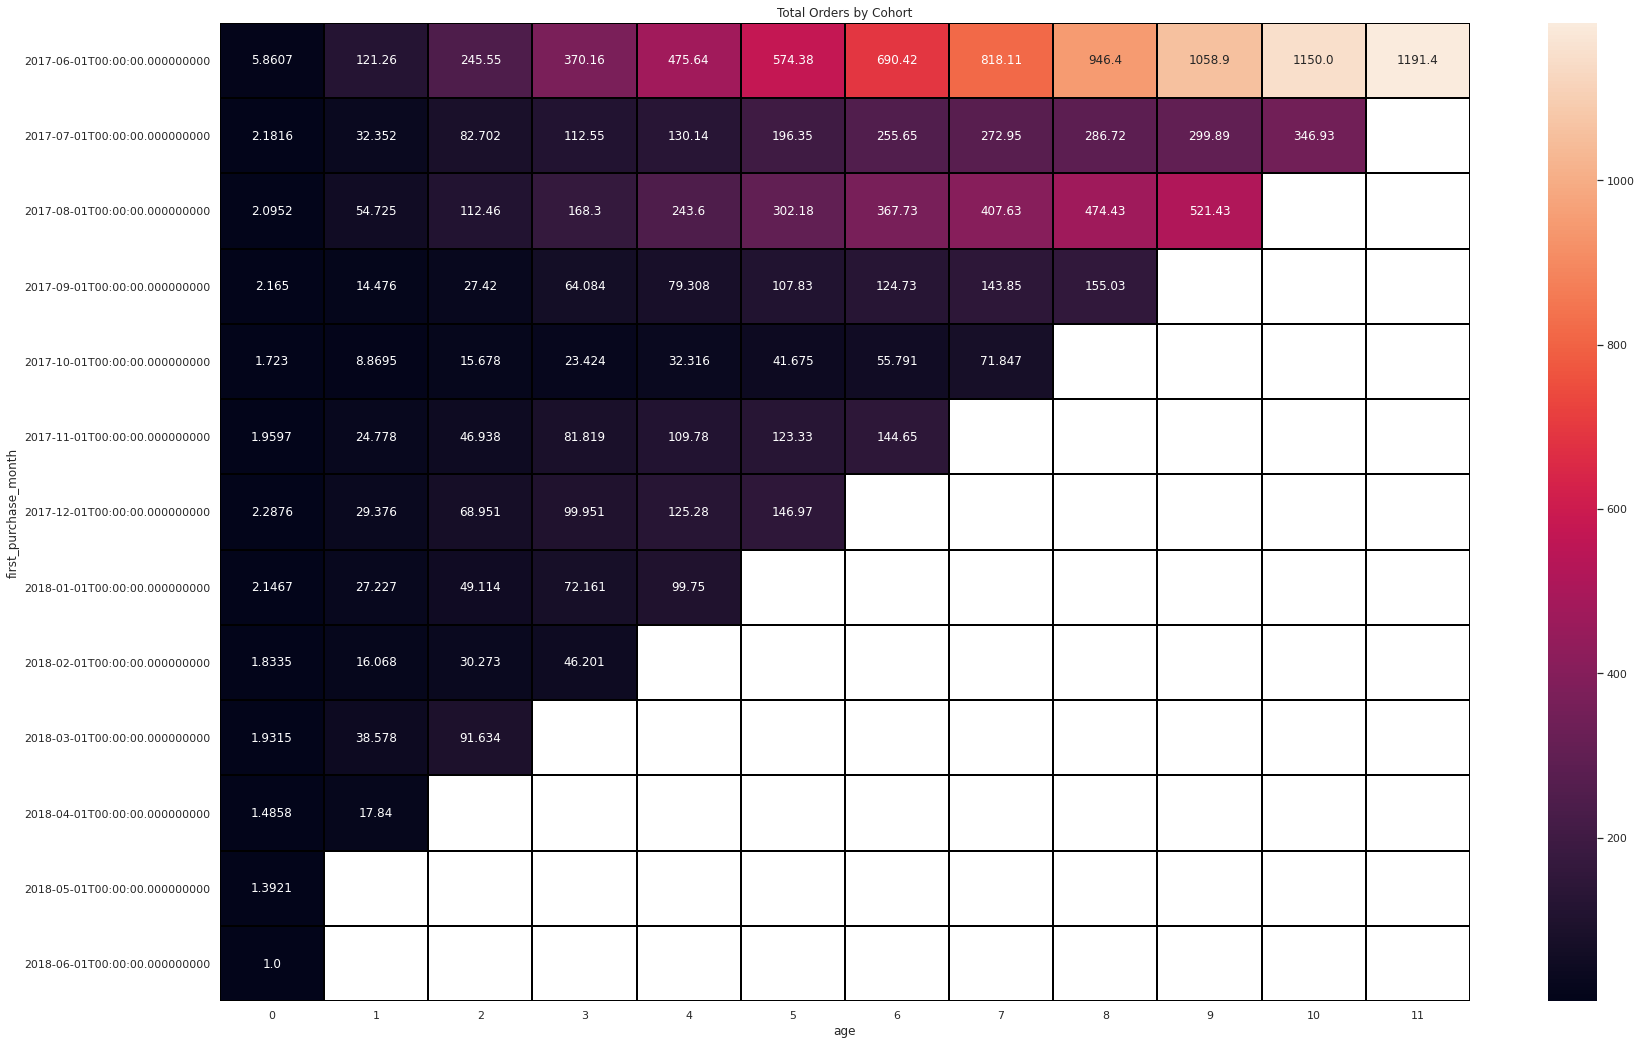

In [ ]:
sns.set(style = 'white')
plt.figure(figsize = (28,18))
plt.title('Total Orders by Cohort')
sns.heatmap(
    order_report_pivot, annot = True, fmt = '.5', linewidths = 1, linecolor = 'black'
)

### Lifetime Orders Conclusion

When looking at lifetime orders by Cohort we see very consistent trends with users generally making between 1 and 2 purchases each month. There were some spikes between the 4th and 6th month, in line with the higher sales in the months leading up to the winter holiday season we've seen in other sections of this analysis. 

### Assorted Sales Data

Below, in order are the following metrics:

- Total Purchases Monthly
- Average Revenue Monthly
- Average Purchase Size (by User)
- Average Purchase Size (Monthly)

In [ ]:
# finding total purchases monthly unique users

purchases_pivot = orders_data_mod.pivot_table(
    index = 'purchase_month',
    values = 'uid',
    aggfunc = 'nunique'
)

Text(0, 0.5, 'Purchases')

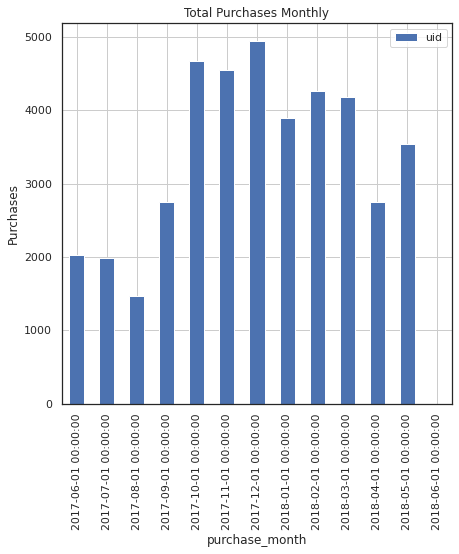

In [ ]:
purchases_pivot.plot(kind = 'bar', grid = True, figsize = (7,7))
plt.title('Total Purchases Monthly')
plt.ylabel('Purchases')

In [ ]:
avg_revenue_pivot = orders_data_mod.pivot_table(
    index = 'purchase_month',
    values = 'revenue',
    aggfunc = 'mean'
)

Text(0, 0.5, 'Revenue')

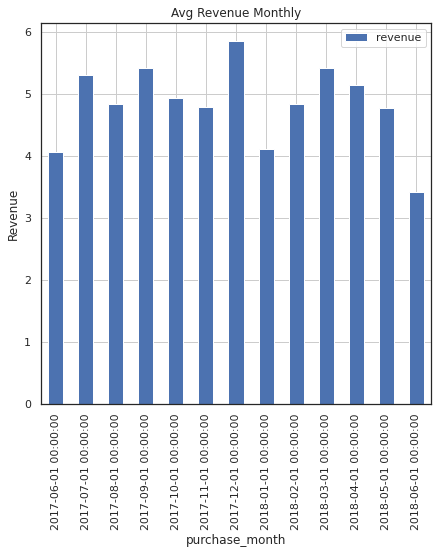

In [ ]:
# finding avg revenue monthly

avg_revenue_pivot.plot(kind = 'bar', grid = True, figsize = (7,7))
plt.title('Avg Revenue Monthly')
plt.ylabel('Revenue')

In [ ]:
avg_purchase_size_pivot = orders_data_mod.pivot_table(
    index = 'uid',
    values = 'revenue',
    aggfunc = 'mean'
)

Text(0.5, 0, 'Frequency')

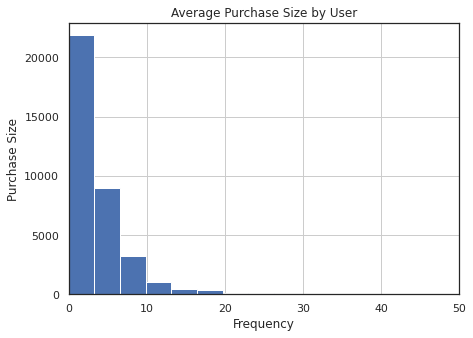

In [ ]:
avg_purchase_size_pivot.hist(bins = 200, figsize= (7,5))
plt.xlim(0,50)
plt.title('Average Purchase Size by User')
plt.ylabel('Purchase Size')
plt.xlabel('Frequency')

In [ ]:
avg_purchase = orders_data_mod.groupby('purchase_month').agg({'uid':'nunique','revenue':'mean'}).reset_index()

Text(0, 0.5, 'Puchase Size')

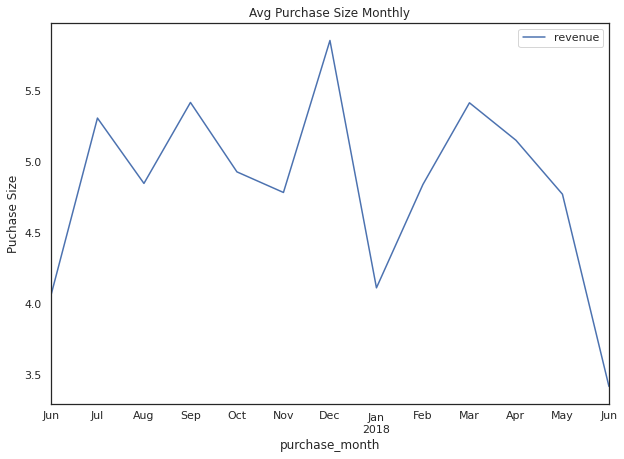

In [ ]:
avg_purchase.plot(x = 'purchase_month', y = 'revenue', kind = 'line', figsize = (10,7))
plt.title('Avg Purchase Size Monthly')
plt.ylabel('Puchase Size')

### Finding LTV

To find LTV first I will need to create cohorts, sum revenue by purchase month, and divide by total users. From there I will create a heatmap to show LTV by cohort. 

In [ ]:
orders_data.head()

,buy_ts,revenue,uid,buyer
0,2017-06-01 00:10:00,17.00,10329302124590727494,Yes
1,2017-06-01 00:25:00,0.55,11627257723692907447,Yes
2,2017-06-01 00:27:00,0.37,17903680561304213844,Yes
3,2017-06-01 00:29:00,0.55,16109239769442553005,Yes
4,2017-06-01 07:58:00,0.37,14200605875248379450,Yes


In [ ]:
#building purchase cohorts

first_orders = orders_data.groupby(['uid']).agg({'buy_ts':'min'}).reset_index()
first_orders.columns = ['uid', 'first_purchase_date']
first_orders['first_purchase_month'] = first_orders['first_purchase_date'].astype('datetime64[M]')
first_orders.head()

,uid,first_purchase_date,first_purchase_month
0,313578113262317,2018-01-03 21:51:00,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-01
2,2429014661409475,2017-10-11 18:33:00,2017-10-01
3,2464366381792757,2018-01-28 15:54:00,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-01


In [ ]:
cohort_sizes = first_orders.groupby(['first_purchase_month']).agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_purchase_month', 'n_buyers']
cohort_sizes.head()

,first_purchase_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [ ]:
cohorts = orders_data_mod.groupby(['first_purchase_month', 'purchase_month']).agg({'revenue':'sum'}).reset_index()
cohorts.head(10)

,first_purchase_month,purchase_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58
5,2017-06-01,2017-11-01,1487.92
6,2017-06-01,2017-12-01,1922.74
7,2017-06-01,2018-01-01,1176.56
8,2017-06-01,2018-02-01,1119.15
9,2017-06-01,2018-03-01,1225.51


In [ ]:
# getting LTV based on revenue (margin rate not supplied)

ltv_report = pd.merge(cohort_sizes, cohorts, on = ['first_purchase_month'])

ltv_report['age'] = (
    ltv_report['purchase_month'] - ltv_report['first_purchase_month']
) / np.timedelta64(1, 'M')
ltv_report['age'] = ltv_report['age'].round().astype('int')

In [ ]:
ltv_report['ltv'] = ltv_report['revenue'] / ltv_report['n_buyers']
ltv_report.head()

,first_purchase_month,n_buyers,purchase_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [ ]:
ltv_output = ltv_report.pivot_table(
    index='first_purchase_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis = 1)

ltv_output.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.64738,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.96896,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.23118,8.386854,
2017-08-01,5.276518,5.748511,6.206993,6.59827,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,,
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.25122,13.435227,,,
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,,,,
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,,,,,
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,,,,,,
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,,,,,,,
2018-02-01,4.156987,4.435262,4.513777,4.587921,,,,,,,,


<AxesSubplot:title={'center':'LTV by Cohort'}, xlabel='age', ylabel='first_purchase_month'>

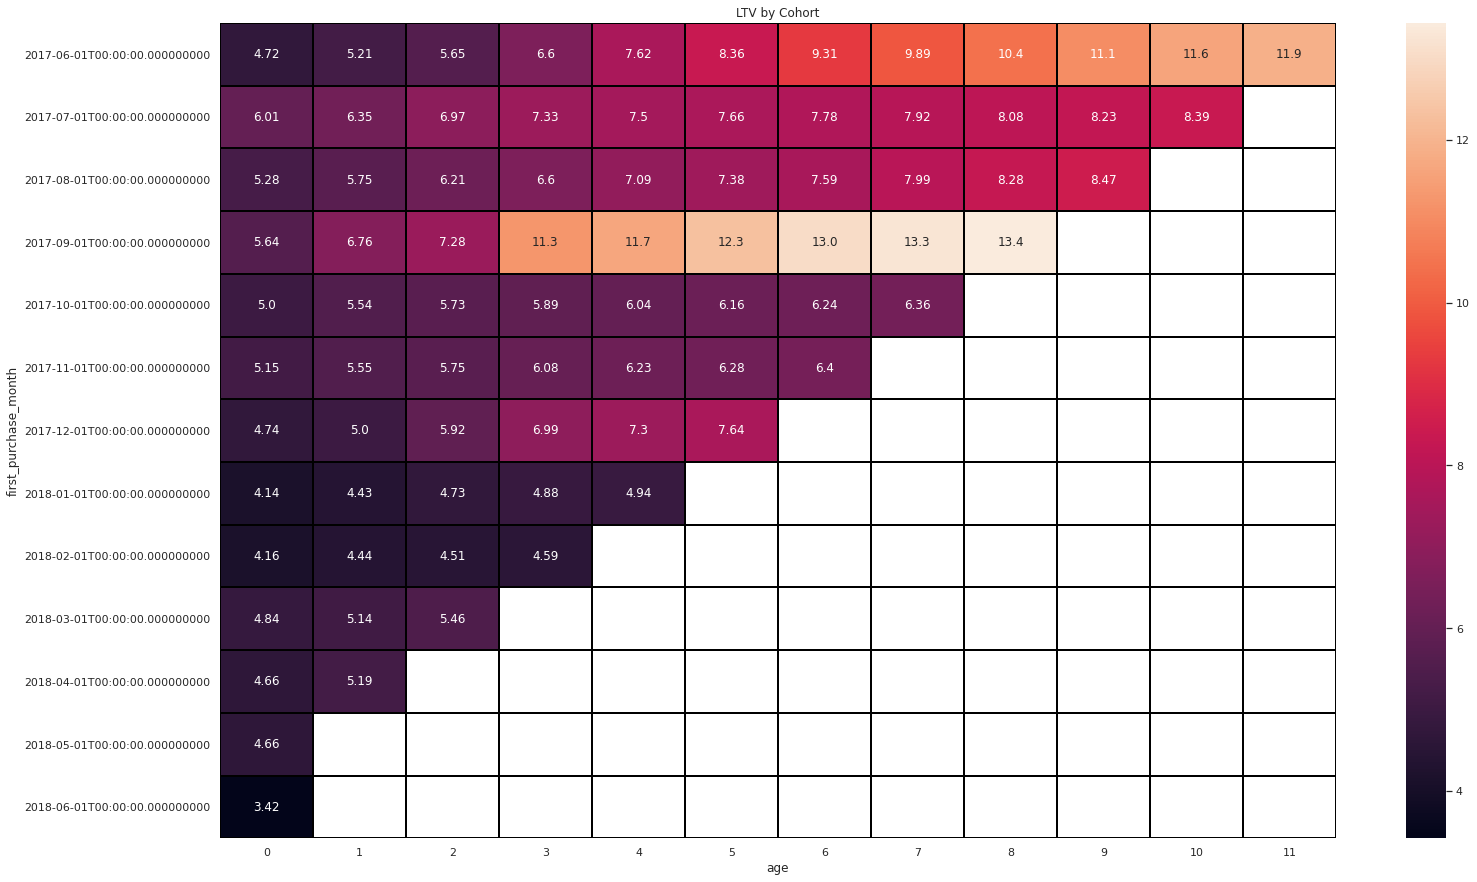

In [ ]:
sns.set(style = 'white')
plt.figure(figsize = (25,15))
plt.title('LTV by Cohort')
sns.heatmap(
    ltv_output, annot = True, fmt = '.3', linewidths = 1, linecolor = 'black'
)

### Sales Analysis Conclusion

Looking back on the sales portion of my analysis I'v found the following:

The `time_to_purchase` series object and histogram show us that the vast majority of users make their first purchase within 2 days of their first visit, however there are some extreme outliers which raise the mean length between first visit and first purchase to 17 days. 

Total purchases monthly peak in February and December but drop the lowest points in the summer between June and August. Putchases in the remaining months remain fairly consistent with some fluctuations. Interestingly, while this is generally consistent with average monthly revenue February is a low point overall. The spike in December however is consistent across both avg purchases and avg revenue. 

It is possible that at the beginning of the year the products available, while popular, were cheaper than those available later on, explaining the purchases to revenue disparity. We can infer from the jump in September that there was an increase in both user engagement and product prices as the relationship between avg purchases and avg revenue is consistent in that month like in December. Through October and November however while avg purchases remains high avg revenue dropped slightly. 

When examining LTV we can see that the first cohort is consistently the highest, and that their purchaseing spikes in that October - February period we've been seeing represented throughout this section. Interestingly, the forth cohort had a huge spike in spending in December (again following the general december spike) that far outspent any other cohort. After this spike however their spend dropped to very low levels. Cohorts following the forth all had very low monthly spending and even lower return spending, which relates to the low retention rate of these cohorts. 

## Marketing Analysis

Now that the product and sales analysis portions are completed I can turn my attention to marketing costs analysis. Here I will be examining the following factors:

- total expenditure (overall/ per source/ over time)
- Customer aquisition cost per source
- ROI

These will allow me to best make recomendations regarding marketing costs and what advertisment avenues are most valuable. 

In [ ]:
# lets look at our cost dataframe again

costs_data.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [ ]:
# calculating overall marketing costs 
overall_cost = costs_data['costs'].sum()

overall_cost

329131.62

In [ ]:
cost_per_source = costs_data.pivot_table(
    index = 'source_id',
    values = 'costs',
    aggfunc = 'sum'
)

cost_per_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Text(0, 0.5, 'Costs')

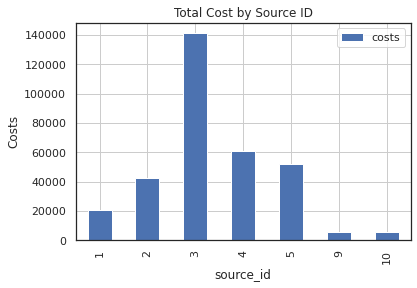

In [ ]:
# calculating total costs per source
cost_per_source.plot(kind = 'bar', grid = True)
plt.title('Total Cost by Source ID')
plt.ylabel('Costs')

In [ ]:
costs_data['month'] = costs_data['dt'].astype('datetime64[M]')

Text(0, 0.5, 'Costs')

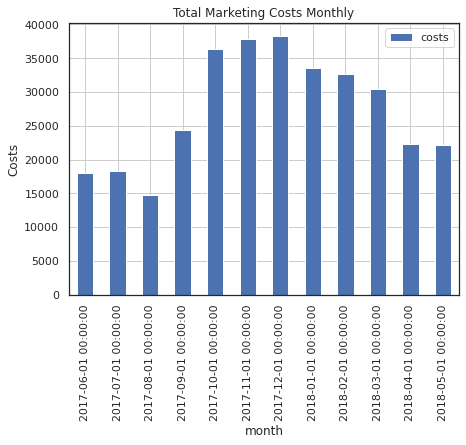

In [ ]:
cost_monthly = costs_data.pivot_table(
    index = 'month',
    values = 'costs',
    aggfunc = 'sum'
)

cost_monthly.plot(kind = 'bar', grid = True, figsize = (7,5))
plt.title('Total Marketing Costs Monthly')
plt.ylabel('Costs')

In [ ]:
cost_by_month = costs_data.pivot_table(
    index = 'month',
    columns = 'source_id',
    values = 'costs',
    aggfunc = 'sum'
)

Text(0, 0.5, 'Cost')

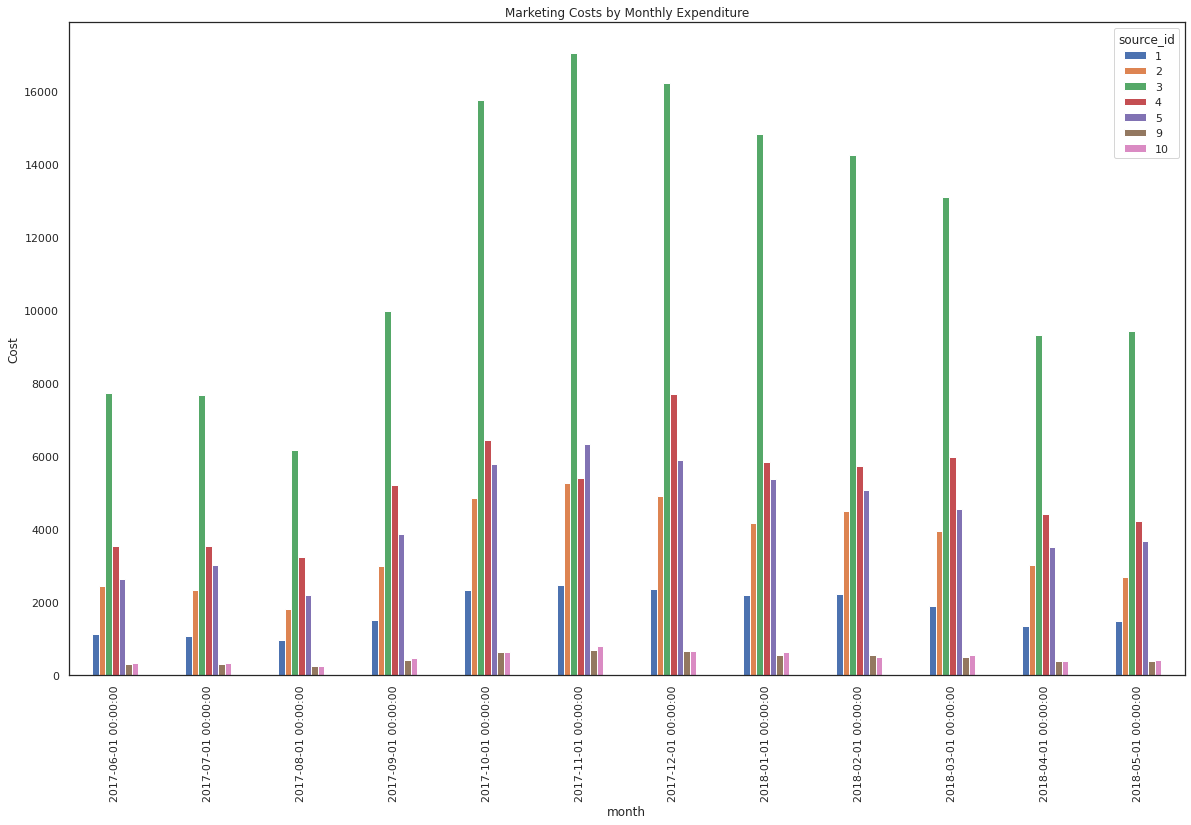

In [ ]:
# calculating total marketing costs monthly 
cost_by_month.plot(kind = 'bar', figsize = (20,12))
plt.title('Marketing Costs by Monthly Expenditure')
plt.ylabel('Cost')

### Calculating CAC

In [ ]:
orders_data.head()

,buy_ts,revenue,uid,buyer
0,2017-06-01 00:10:00,17.00,10329302124590727494,Yes
1,2017-06-01 00:25:00,0.55,11627257723692907447,Yes
2,2017-06-01 00:27:00,0.37,17903680561304213844,Yes
3,2017-06-01 00:29:00,0.55,16109239769442553005,Yes
4,2017-06-01 07:58:00,0.37,14200605875248379450,Yes


In [ ]:
first_source = visit_data.sort_values('start_ts').groupby('uid').agg({'source_id':'first'}).reset_index()

In [ ]:
orders_data = pd.merge(orders_data, first_source, how = 'left', on = 'uid')
orders_data.head()

,buy_ts,revenue,uid,buyer,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,Yes,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,Yes,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,Yes,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,Yes,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,Yes,3


In [ ]:
users_by_source = orders_data.groupby('source_id').agg({'uid':'nunique'}).reset_index()
users_by_source.columns = ['source_id', 'n_users']
users_by_source.head()

,source_id,n_users
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931


In [ ]:
costs_data.head()

,source_id,dt,costs,month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [ ]:
costs_grouped = costs_data.groupby('source_id').agg({'costs':'sum'}).reset_index()
costs_grouped.head()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10


In [ ]:
costs_by_source = pd.merge(users_by_source,costs_grouped, how = 'inner', on = 'source_id')
costs_by_source.head()

,source_id,n_users,costs
0,1,2899,20833.27
1,2,3506,42806.04
2,3,10473,141321.63
3,4,10296,61073.60
4,5,6931,51757.10


In [ ]:
costs_by_source['cac'] = costs_by_source['costs'] / costs_by_source['n_users']
costs_by_source.head()

,source_id,n_users,costs,cac
0,1,2899,20833.27,7.186364
1,2,3506,42806.04,12.209367
2,3,10473,141321.63,13.493901
3,4,10296,61073.60,5.931779
4,5,6931,51757.10,7.467479


In [ ]:
orders_data_ = pd.merge(orders_data, costs_by_source, how = 'inner', on = 'source_id')
orders_data_.head()

,buy_ts,revenue,uid,buyer,source_id,n_users,costs,cac
0,2017-06-01 00:10:00,17.00,10329302124590727494,Yes,1,2899,20833.27,7.186364
1,2017-06-01 09:22:00,1.22,3644482766749211722,Yes,1,2899,20833.27,7.186364
2,2017-06-01 09:23:00,0.37,1074355127080856382,Yes,1,2899,20833.27,7.186364
3,2017-06-01 10:38:00,2.08,2050423809815667474,Yes,1,2899,20833.27,7.186364
4,2017-06-01 11:01:00,1.67,6481195116107172636,Yes,1,2899,20833.27,7.186364


In [ ]:
first_purchase_date = orders_data_.groupby(['uid'])['buy_ts'].min()

first_purchase_date.name = 'first_purchase_date'

orders_data_ = orders_data_.join(first_purchase_date, on = 'uid')

In [ ]:
orders_data_['first_purchase_month'] = orders_data_['first_purchase_date'].astype('datetime64[M]')

orders_data_.head()

,buy_ts,revenue,uid,buyer,source_id,n_users,costs,cac,first_purchase_date,first_purchase_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,Yes,1,2899,20833.27,7.186364,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 09:22:00,1.22,3644482766749211722,Yes,1,2899,20833.27,7.186364,2017-06-01 09:22:00,2017-06-01
2,2017-06-01 09:23:00,0.37,1074355127080856382,Yes,1,2899,20833.27,7.186364,2017-06-01 09:23:00,2017-06-01
3,2017-06-01 10:38:00,2.08,2050423809815667474,Yes,1,2899,20833.27,7.186364,2017-06-01 10:38:00,2017-06-01
4,2017-06-01 11:01:00,1.67,6481195116107172636,Yes,1,2899,20833.27,7.186364,2017-06-01 11:01:00,2017-06-01


In [ ]:
orders_data_['purchase_month'] = orders_data_['buy_ts'].astype('datetime64[M]')

In [ ]:
# building order user cohorts

orders_data_['age'] = (orders_data_['purchase_month'] - orders_data_['first_purchase_month'])

orders_data_['age'] = orders_data_['age'] / np.timedelta64(1, 'M')

orders_data_['age'] = orders_data_['age'].round().astype(int)

In [ ]:
orders_data_.head()

,buy_ts,revenue,uid,buyer,source_id,n_users,costs,cac,first_purchase_date,first_purchase_month,purchase_month,age
0,2017-06-01 00:10:00,17.00,10329302124590727494,Yes,1,2899,20833.27,7.186364,2017-06-01 00:10:00,2017-06-01,2017-06-01,0
1,2017-06-01 09:22:00,1.22,3644482766749211722,Yes,1,2899,20833.27,7.186364,2017-06-01 09:22:00,2017-06-01,2017-06-01,0
2,2017-06-01 09:23:00,0.37,1074355127080856382,Yes,1,2899,20833.27,7.186364,2017-06-01 09:23:00,2017-06-01,2017-06-01,0
3,2017-06-01 10:38:00,2.08,2050423809815667474,Yes,1,2899,20833.27,7.186364,2017-06-01 10:38:00,2017-06-01,2017-06-01,0
4,2017-06-01 11:01:00,1.67,6481195116107172636,Yes,1,2899,20833.27,7.186364,2017-06-01 11:01:00,2017-06-01,2017-06-01,0


In [ ]:
ltv_report.head()

,first_purchase_month,n_buyers,purchase_month,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [ ]:
ltv_report = ltv_report.drop(['revenue'], axis = 1)

In [ ]:
orders_data_ = pd.merge(orders_data_, ltv_report, how = 'inner', on = ['first_purchase_month', 'purchase_month', 'age'])

In [ ]:
orders_data_.head()

,buy_ts,revenue,uid,buyer,source_id,n_users,costs,cac,first_purchase_date,first_purchase_month,purchase_month,age,n_buyers,ltv
0,2017-06-01 00:10:00,17.00,10329302124590727494,Yes,1,2899,20833.27,7.186364,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,2023,4.724414
1,2017-06-01 09:22:00,1.22,3644482766749211722,Yes,1,2899,20833.27,7.186364,2017-06-01 09:22:00,2017-06-01,2017-06-01,0,2023,4.724414
2,2017-06-01 09:23:00,0.37,1074355127080856382,Yes,1,2899,20833.27,7.186364,2017-06-01 09:23:00,2017-06-01,2017-06-01,0,2023,4.724414
3,2017-06-01 10:38:00,2.08,2050423809815667474,Yes,1,2899,20833.27,7.186364,2017-06-01 10:38:00,2017-06-01,2017-06-01,0,2023,4.724414
4,2017-06-01 11:01:00,1.67,6481195116107172636,Yes,1,2899,20833.27,7.186364,2017-06-01 11:01:00,2017-06-01,2017-06-01,0,2023,4.724414


In [ ]:
cac_source_pivot = orders_data_.pivot_table(
    index = 'source_id',
    values = 'cac',
    aggfunc = 'mean'
)

cac_source_pivot.head()

,cac
source_id,
1,7.186364
2,12.209367
3,13.493901
4,5.931779
5,7.467479


Text(0, 0.5, 'Cost')

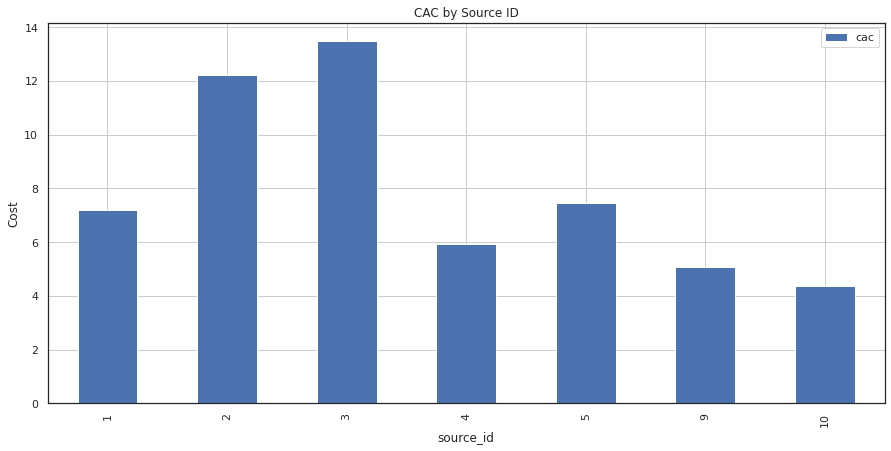

In [ ]:
cac_source_pivot.plot(kind = 'bar', grid = 'true', figsize = (15,7))
plt.title('CAC by Source ID')
plt.ylabel('Cost')

### Calculating ROI

In [ ]:
orders_data_['roi'] = orders_data_['ltv'] / orders_data_['cac']

orders_data_.head()

,buy_ts,revenue,uid,buyer,source_id,n_users,costs,cac,first_purchase_date,first_purchase_month,purchase_month,age,n_buyers,ltv,roi
0,2017-06-01 00:10:00,17.00,10329302124590727494,Yes,1,2899,20833.27,7.186364,2017-06-01 00:10:00,2017-06-01,2017-06-01,0,2023,4.724414,0.657414
1,2017-06-01 09:22:00,1.22,3644482766749211722,Yes,1,2899,20833.27,7.186364,2017-06-01 09:22:00,2017-06-01,2017-06-01,0,2023,4.724414,0.657414
2,2017-06-01 09:23:00,0.37,1074355127080856382,Yes,1,2899,20833.27,7.186364,2017-06-01 09:23:00,2017-06-01,2017-06-01,0,2023,4.724414,0.657414
3,2017-06-01 10:38:00,2.08,2050423809815667474,Yes,1,2899,20833.27,7.186364,2017-06-01 10:38:00,2017-06-01,2017-06-01,0,2023,4.724414,0.657414
4,2017-06-01 11:01:00,1.67,6481195116107172636,Yes,1,2899,20833.27,7.186364,2017-06-01 11:01:00,2017-06-01,2017-06-01,0,2023,4.724414,0.657414


In [ ]:
roi_pivot = orders_data_.pivot_table(
    index = 'first_purchase_month',
    columns = 'age',
    values = 'roi',
    aggfunc = 'median'
).cumsum(axis = 1)

roi_pivot

age,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_month,,,,,,,,,,,,
2017-06-01,0.632665,0.700200,0.761098,0.893943,1.036231,1.138577,1.270833,1.348717,1.425698,1.509995,1.589487,1.623884
2017-07-01,0.804852,0.849742,0.936508,0.984579,1.008254,1.029969,1.046696,1.065688,1.087279,1.103157,1.124820,NaN
2017-08-01,0.706600,0.769806,0.831203,0.883601,0.949761,0.987731,1.015942,1.070178,1.109309,1.134482,NaN,NaN
2017-09-01,0.755881,0.847417,0.890083,1.422497,1.476138,1.562789,1.620254,1.652815,1.677456,NaN,NaN,NaN
2017-10-01,0.670070,0.713951,0.739581,0.760625,0.780921,0.797040,0.808398,0.823861,NaN,NaN,NaN,NaN
2017-11-01,0.690284,0.743747,0.770470,0.797085,0.809208,0.816423,0.835798,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.634510,0.655836,0.731605,0.818856,0.844486,0.872174,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.553820,0.577962,0.602883,0.614578,0.619713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.556679,0.579471,0.585901,0.591974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'ROI by Cohort'}, xlabel='age', ylabel='first_purchase_month'>

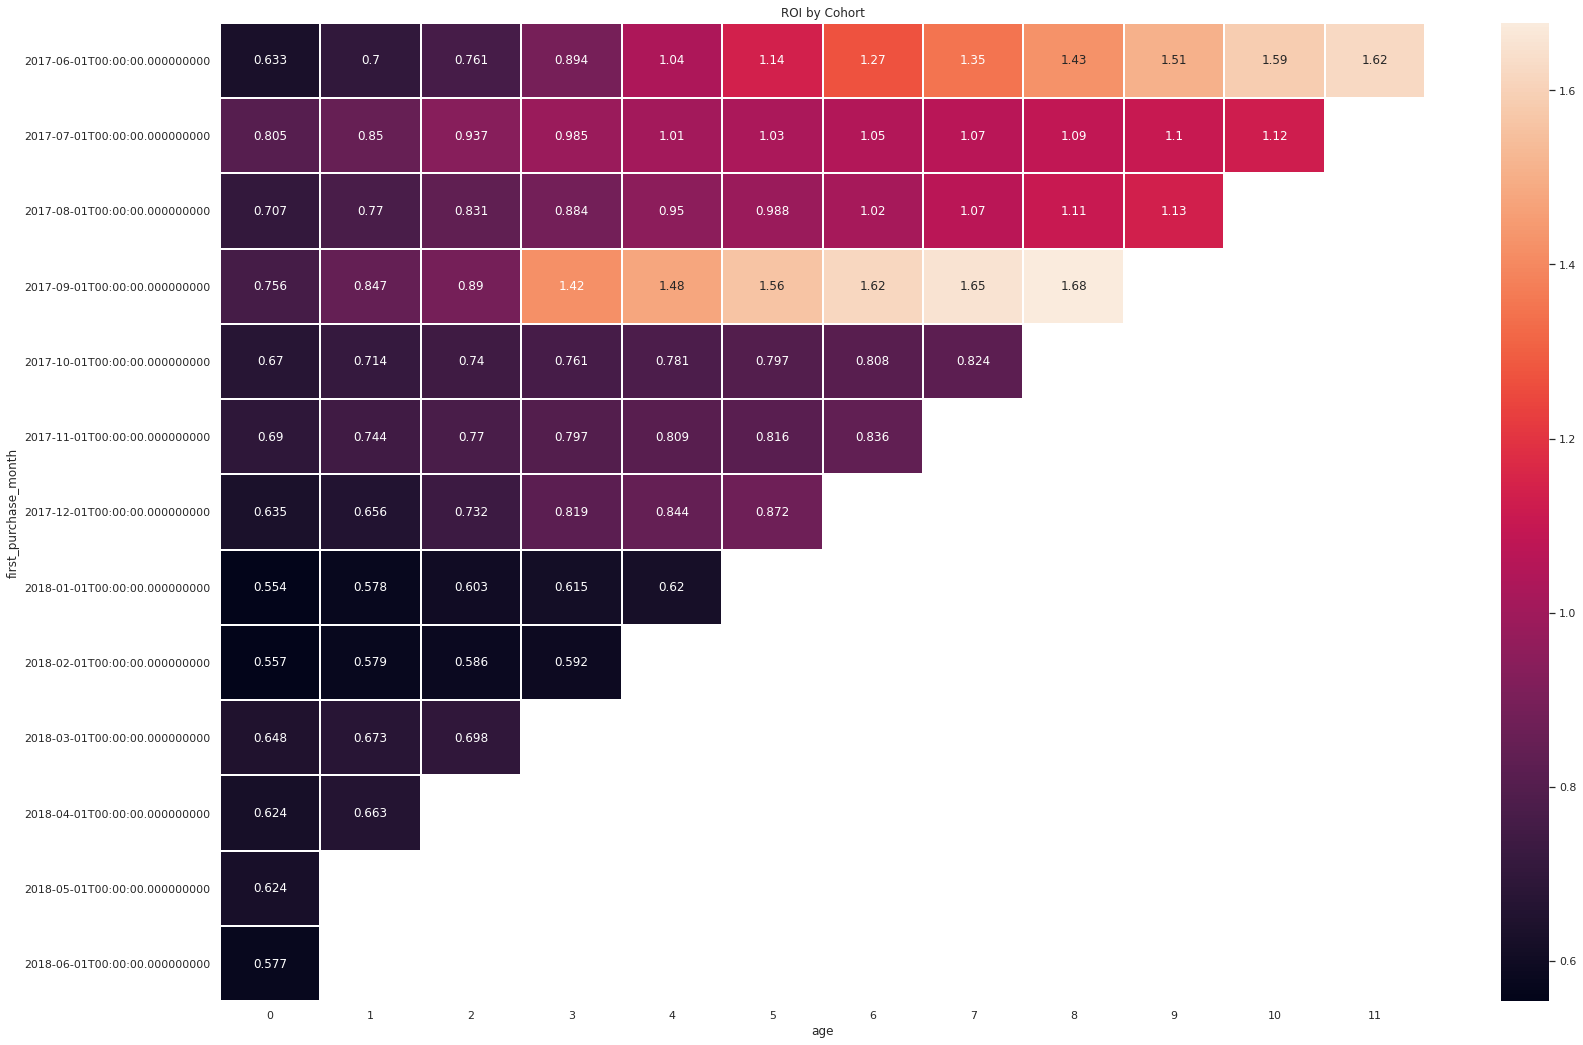

In [ ]:
sns.set(style = 'white')
plt.figure(figsize = (27,18))
plt.title('ROI by Cohort')
sns.heatmap(
    roi_pivot, annot = True, fmt = '.3', linewidths = 1, linecolor = 'white'
)

<AxesSubplot:title={'center':'ROMI for Source ID 1 by Cohort'}, xlabel='age', ylabel='first_purchase_month'>

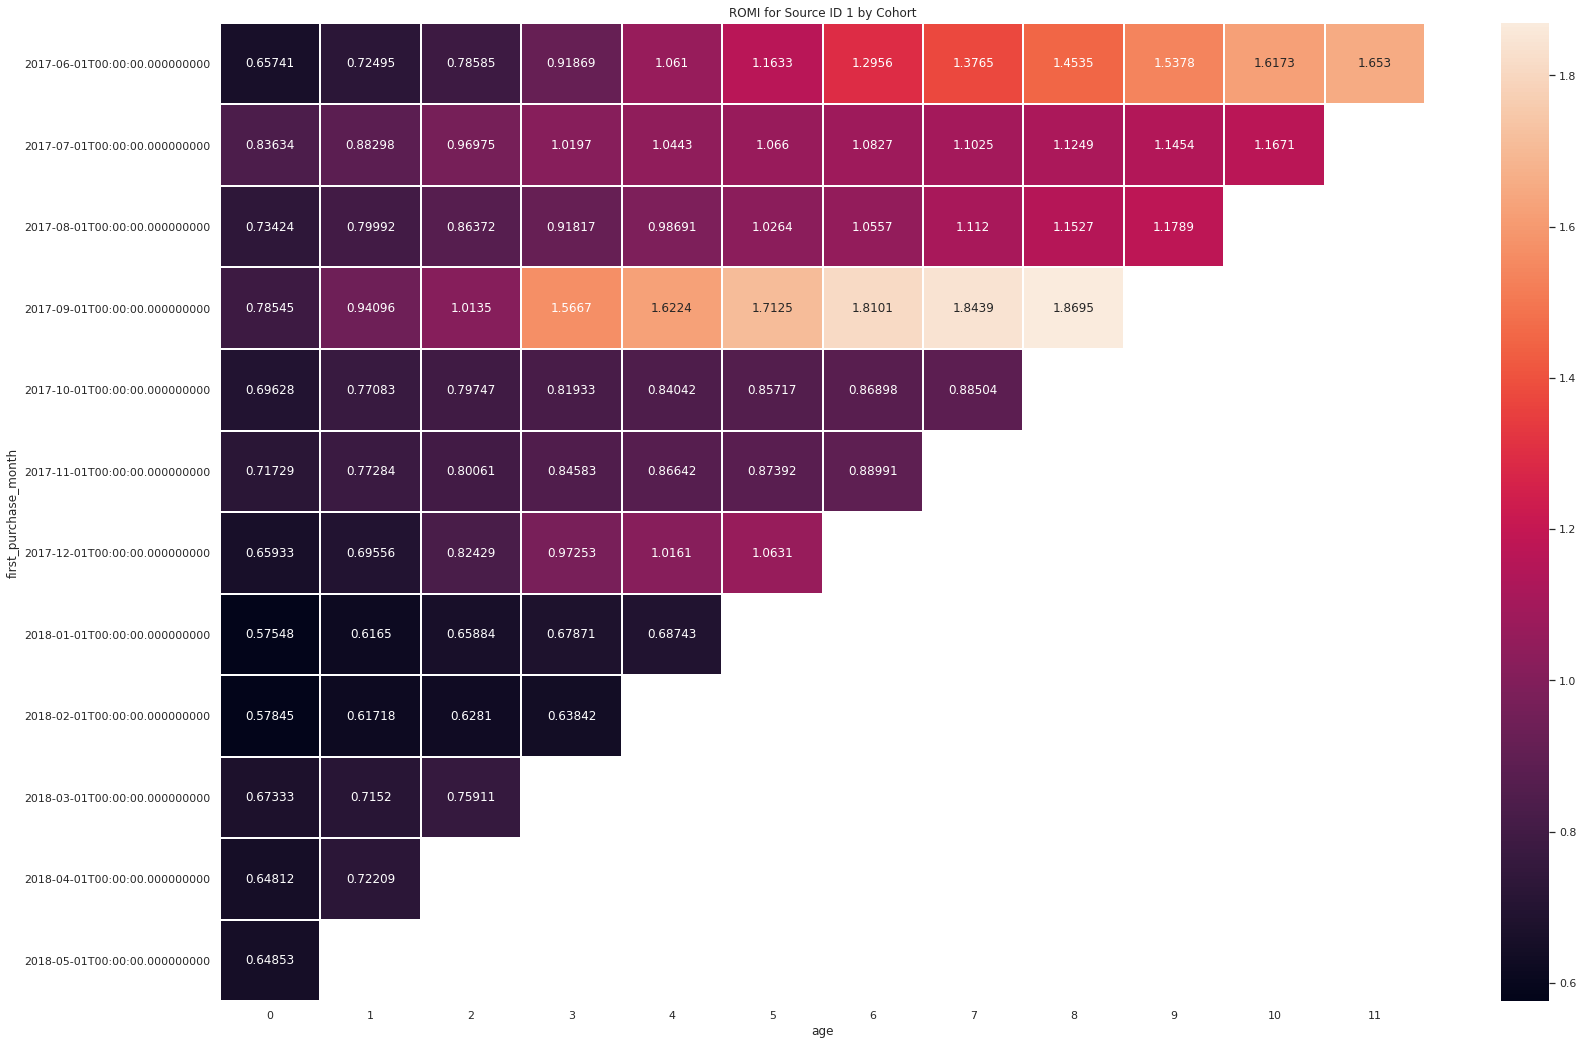

In [ ]:
roi_source_1 = orders_data_.query('source_id == 1').pivot_table(
    index = 'first_purchase_month',
    columns = 'age',
    values = 'roi',
    aggfunc = 'mean'
).cumsum(axis = 1)

sns.set(style = 'white')
plt.figure(figsize = (27,18))
plt.title('ROMI for Source ID 1 by Cohort')
sns.heatmap(
    roi_source_1, annot = True, fmt = '.5', linewidths = 1, linecolor = 'white'
)

<AxesSubplot:title={'center':'ROMI for Source ID 2 by Cohort'}, xlabel='age', ylabel='first_purchase_month'>

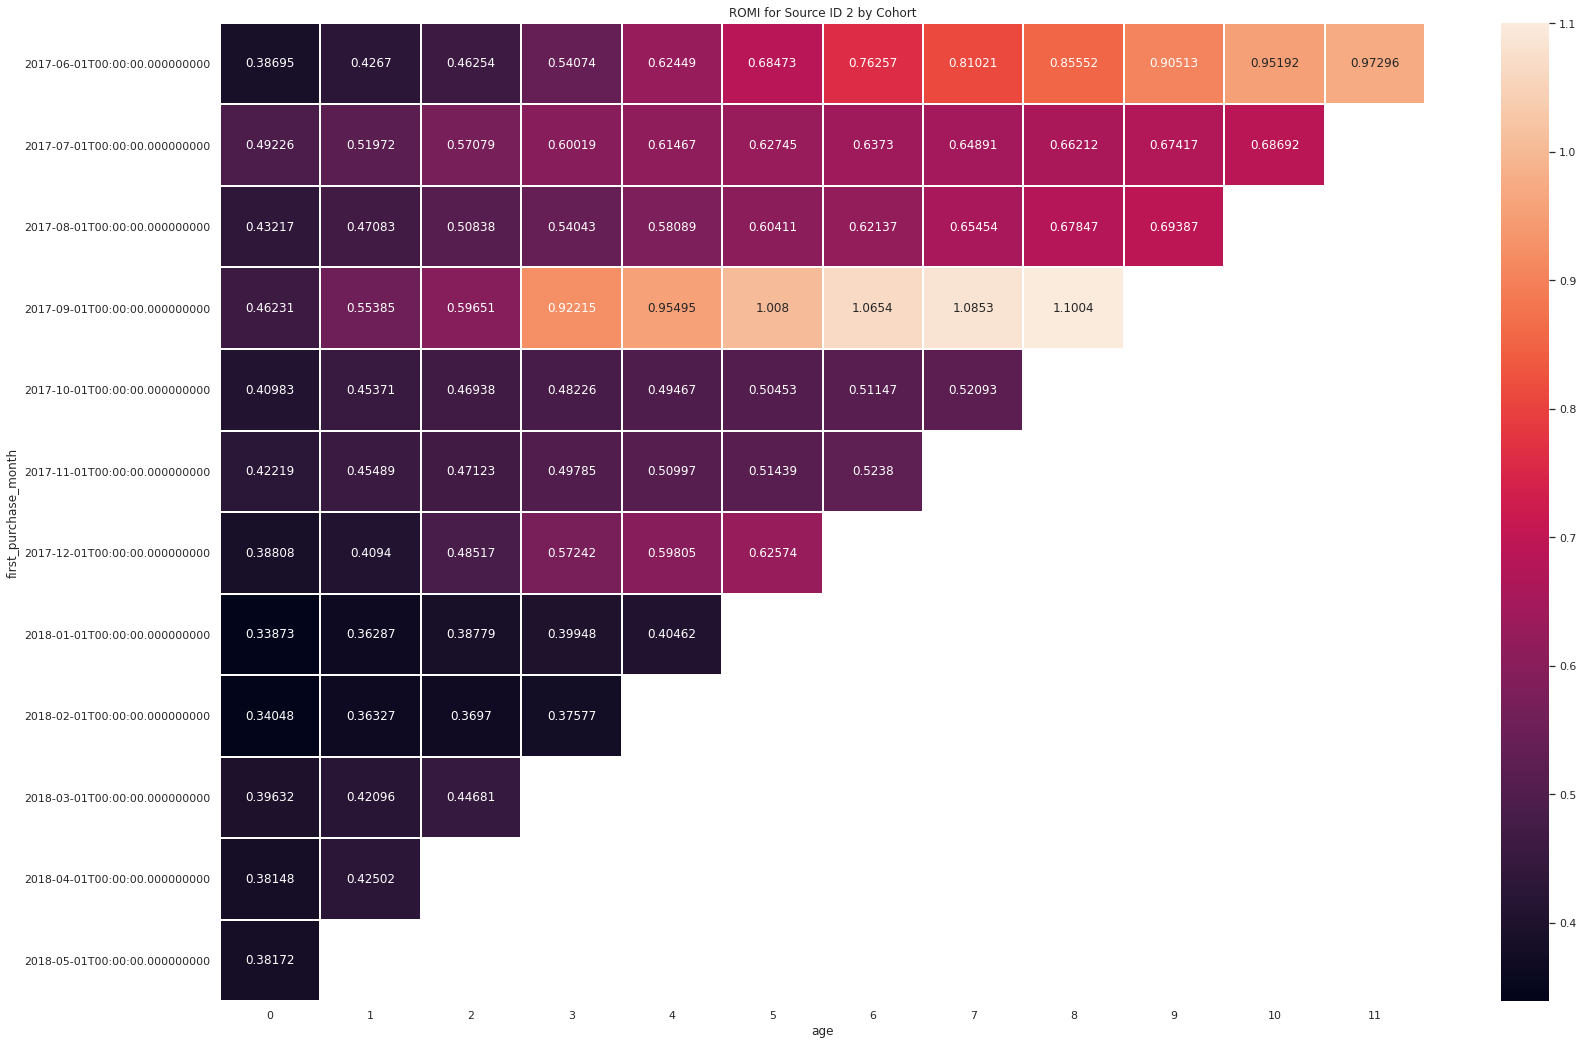

In [ ]:
roi_source_2 = orders_data_.query('source_id == 2').pivot_table(
    index = 'first_purchase_month',
    columns = 'age',
    values = 'roi',
    aggfunc = 'mean'
).cumsum(axis = 1)

sns.set(style = 'white')
plt.figure(figsize = (27,18))
plt.title('ROMI for Source ID 2 by Cohort')
sns.heatmap(
    roi_source_2, annot = True, fmt = '.5', linewidths = 1, linecolor = 'white'
)

<AxesSubplot:title={'center':'ROMI for Source ID 3 by Cohort'}, xlabel='age', ylabel='first_purchase_month'>

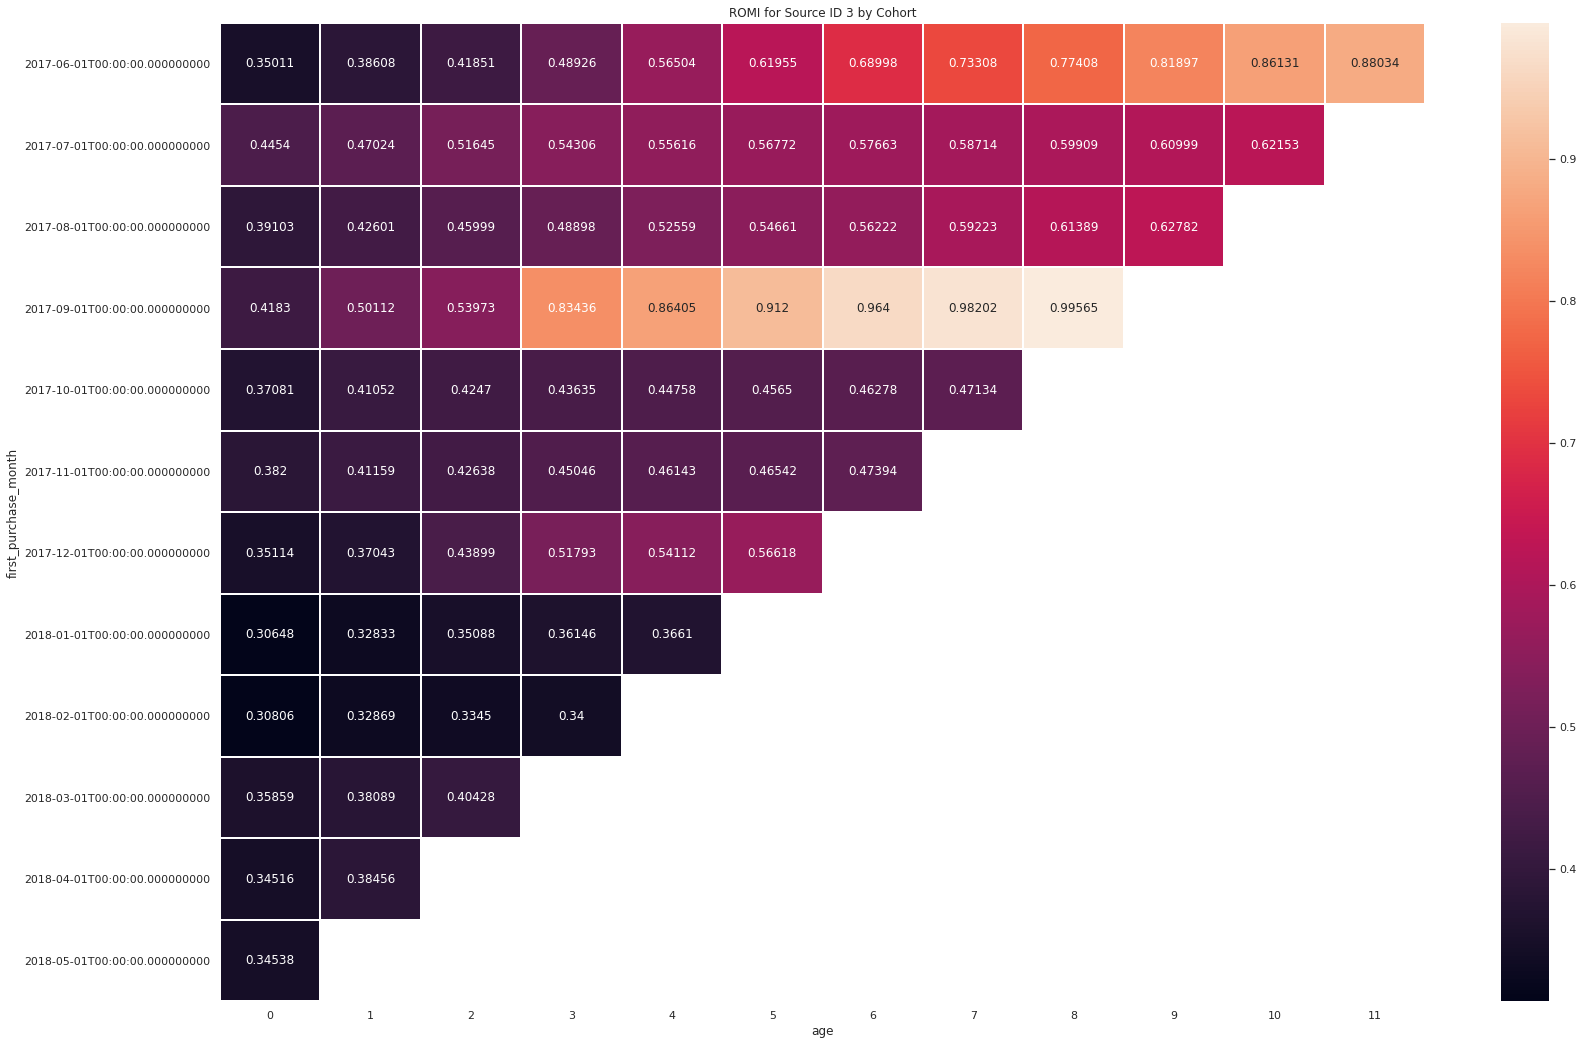

In [ ]:
roi_source_3 = orders_data_.query('source_id == 3').pivot_table(
    index = 'first_purchase_month',
    columns = 'age',
    values = 'roi',
    aggfunc = 'mean'
).cumsum(axis = 1)

sns.set(style = 'white')
plt.figure(figsize = (27,18))
plt.title('ROMI for Source ID 3 by Cohort')
sns.heatmap(
    roi_source_3, annot = True, fmt = '.5', linewidths = 1, linecolor = 'white'
)

<AxesSubplot:title={'center':'ROMI for Source ID 4 by Cohort'}, xlabel='age', ylabel='first_purchase_month'>

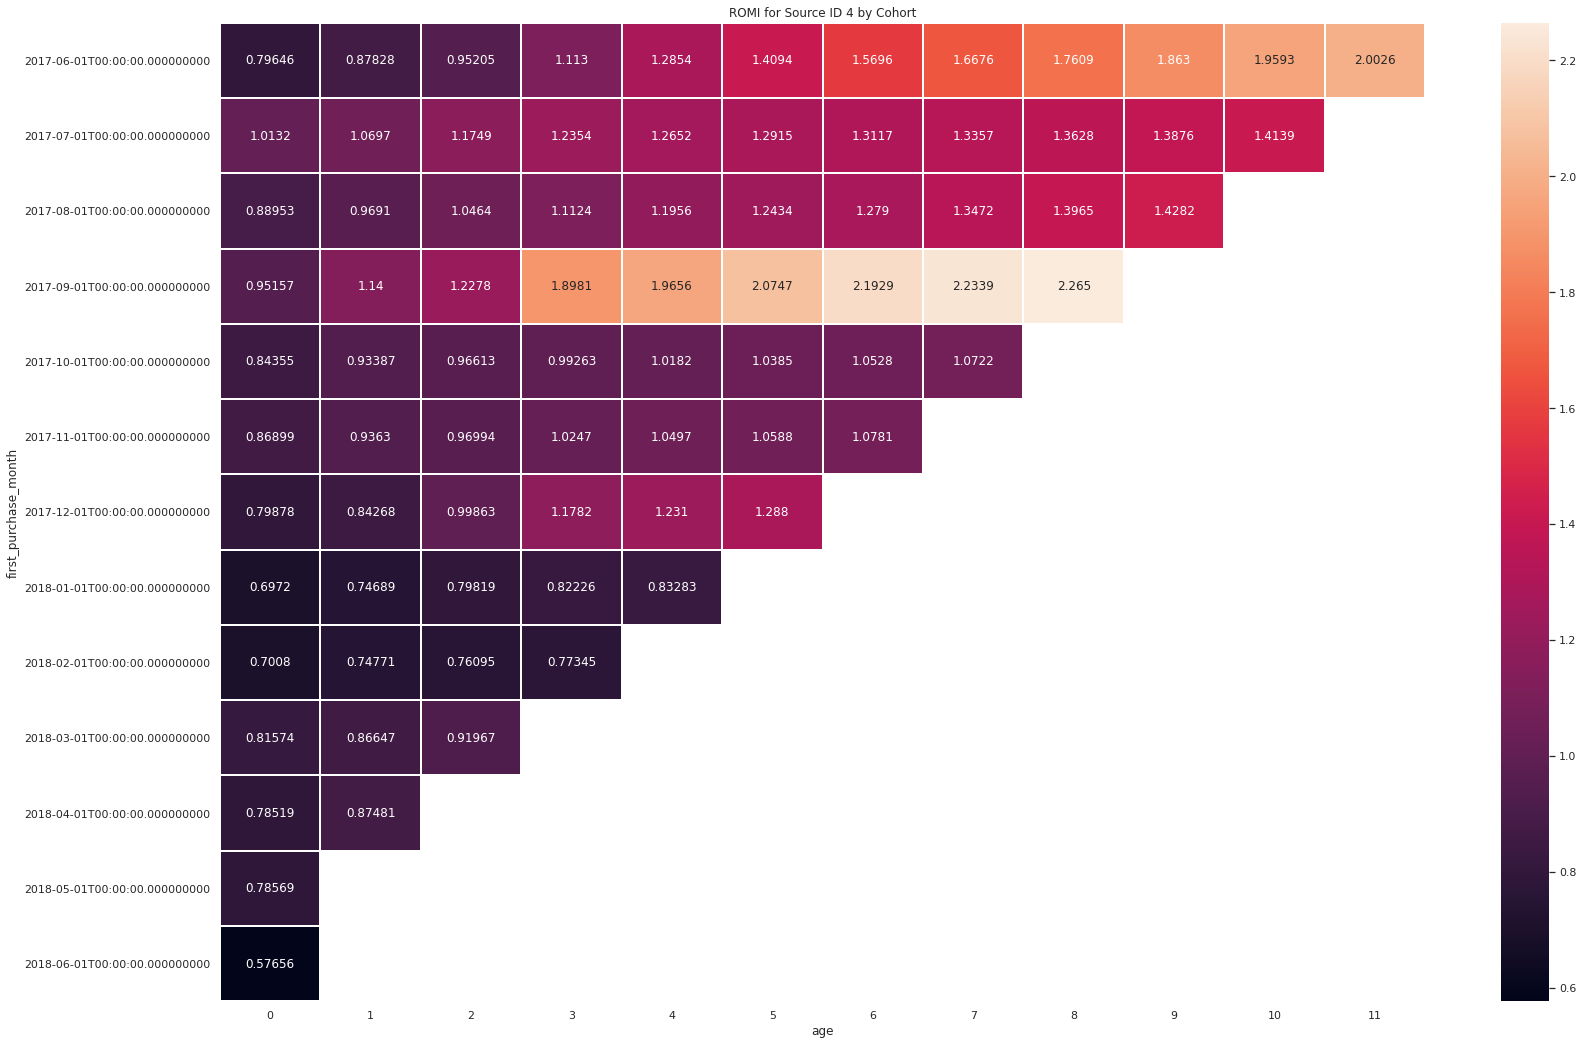

In [ ]:
roi_source_4 = orders_data_.query('source_id == 4').pivot_table(
    index = 'first_purchase_month',
    columns = 'age',
    values = 'roi',
    aggfunc = 'mean'
).cumsum(axis = 1)

sns.set(style = 'white')
plt.figure(figsize = (27,18))
plt.title('ROMI for Source ID 4 by Cohort')
sns.heatmap(
    roi_source_4, annot = True, fmt = '.5', linewidths = 1, linecolor = 'white'
)

<AxesSubplot:title={'center':'ROMI for Source ID 5 by Cohort'}, xlabel='age', ylabel='first_purchase_month'>

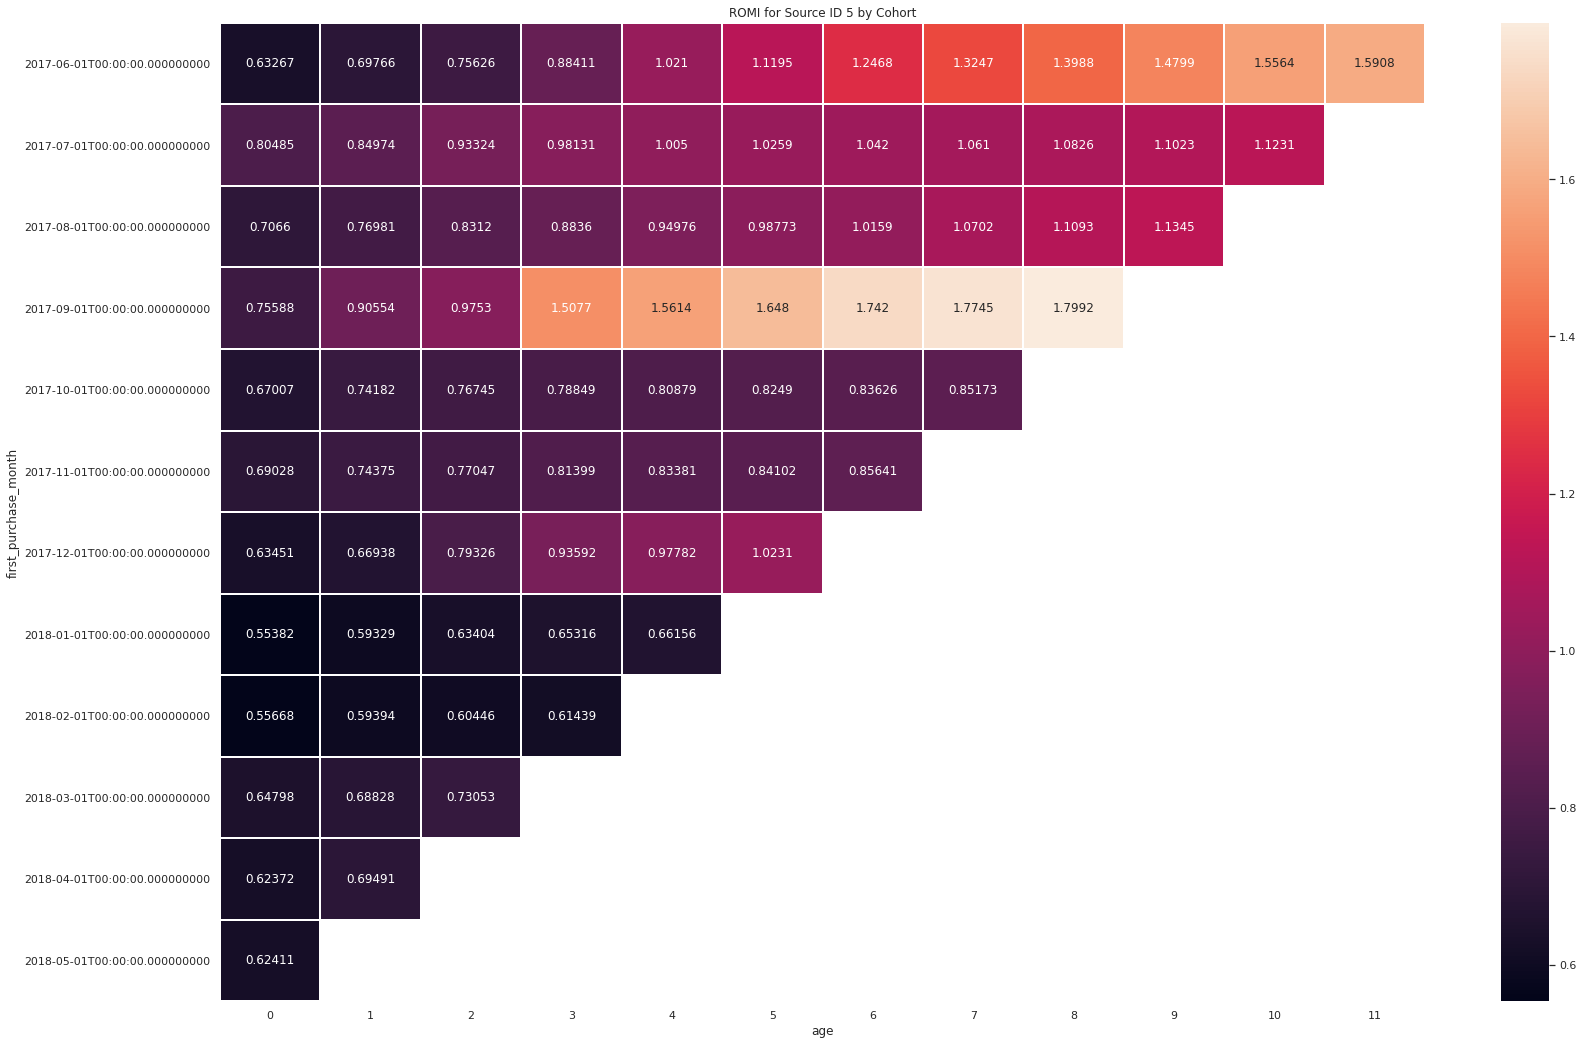

In [ ]:
roi_source_5 = orders_data_.query('source_id == 5').pivot_table(
    index = 'first_purchase_month',
    columns = 'age',
    values = 'roi',
    aggfunc = 'mean'
).cumsum(axis = 1)

sns.set(style = 'white')
plt.figure(figsize = (27,18))
plt.title('ROMI for Source ID 5 by Cohort')
sns.heatmap(
    roi_source_5, annot = True, fmt = '.5', linewidths = 1, linecolor = 'white'
)

<AxesSubplot:title={'center':'ROMI for Source ID 9 by Cohort'}, xlabel='age', ylabel='first_purchase_month'>

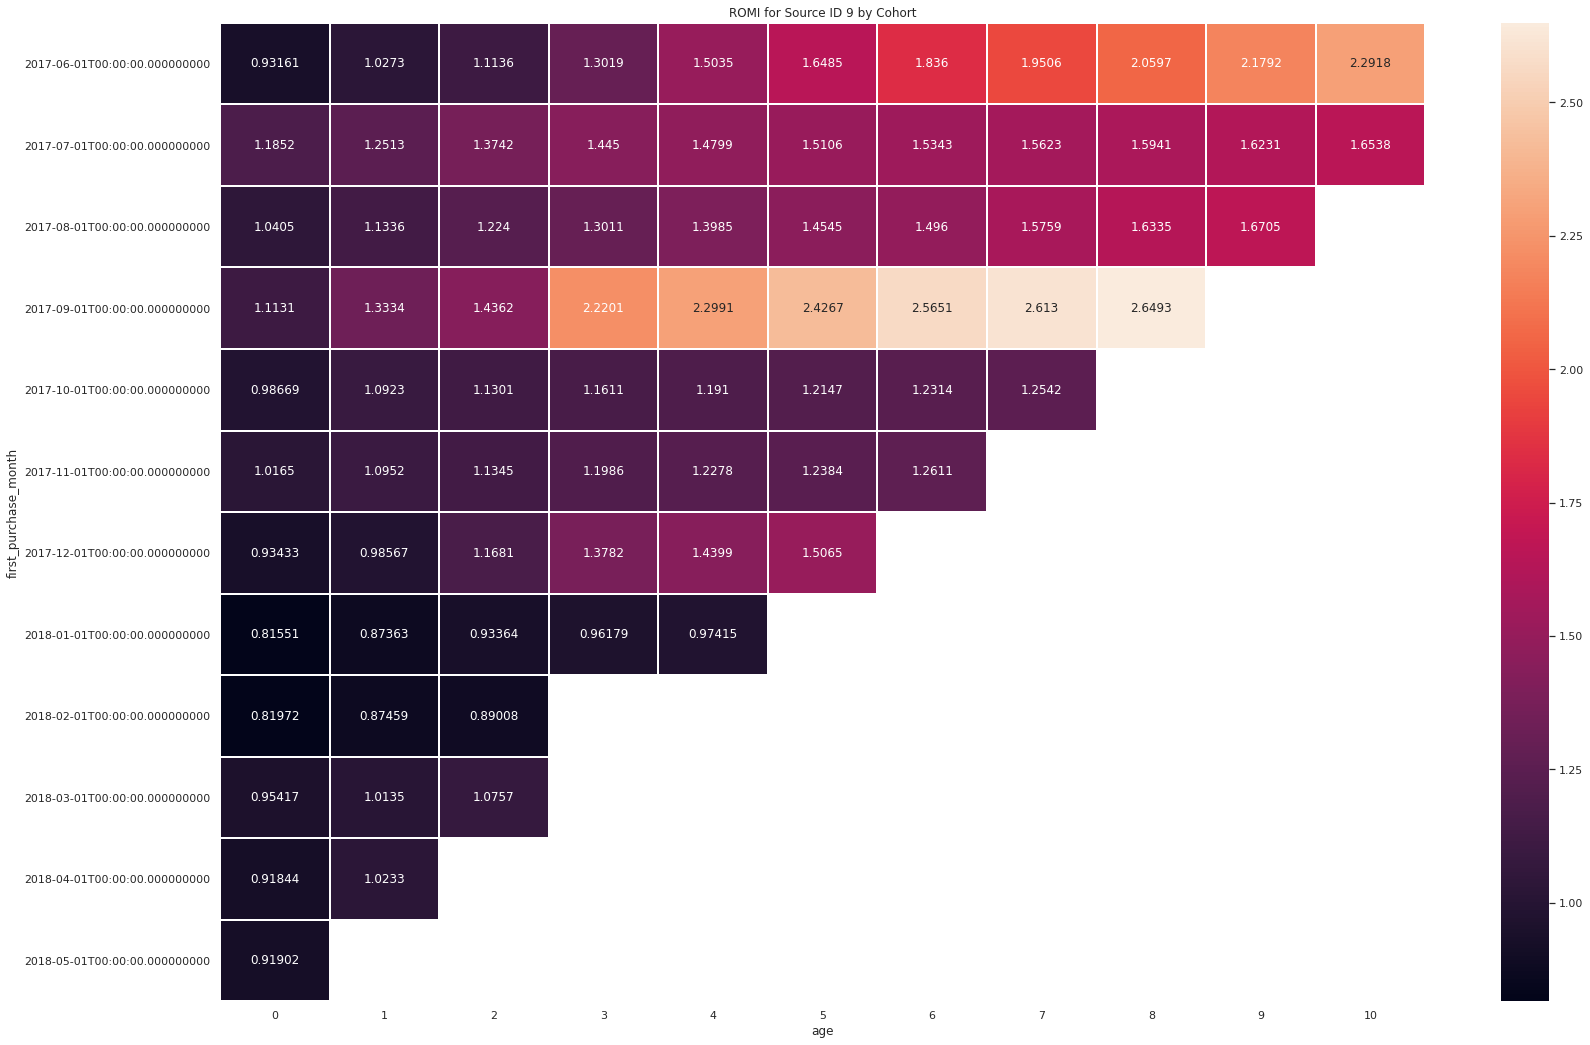

In [ ]:
roi_source_9 = orders_data_.query('source_id == 9').pivot_table(
    index = 'first_purchase_month',
    columns = 'age',
    values = 'roi',
    aggfunc = 'mean'
).cumsum(axis = 1)

sns.set(style = 'white')
plt.figure(figsize = (27,18))
plt.title('ROMI for Source ID 9 by Cohort')
sns.heatmap(
    roi_source_9, annot = True, fmt = '.5', linewidths = 1, linecolor = 'white'
)

### Marketing Analysis Conclusion

**Total Marketing Cost:** $329131.62

Total marketing costs per source can be seen in the 'Total Costs by Source ID' Graph. Source ID 3 was the highest costing source by a wide margin while 2, 4, and 5 were all at a more similar level, each less than half the total cost of source 3. Source 1, 9, and 10 were a tiny fraction of the overall cost. 

Total cost by source ID over time continues this trend with source ID 3 being far and away the most costly marketing avenue. 

The spikes in marketing costs, particularly for source ID 3 align with the spikes in spending seen in the Purchases section of this analysis implying that the extra spent on marketing did in fact attract more buyers. 

CAC by source ID generally alligned with overall costs with CAC for source ID 3 again being the highest, unsurprising given the high overall cost of that marketing avenue. 

ROMI was highest by an enourmous margin for source ID 1, followed by source ID 2 which makes sense given the generally low overall cost of those two source IDs. ROMI was the lowest overall for source ID 3, and quite dramtically so. The high cost of this marketing avenue is unfortunatly not supported by the ROMI of the users drawn by it. 

## Conclusion and Recommendations

**Product Analysis**

While analyzing the product data I found that user interests spikes in the winter months and drops off in the summer while remaining fairly level in the spring and fall. The average user visits once a day and usually spends around 10 minutes on the webpage. They make their first purchase with 2 days of their first visit. 

We can also see that user retention is on the generlly low with a rise in retention for cohort 0 in June, though this is inconsistent with other cohorts. 

The forth cohort had the best retention rate at 8.2%. Unusually, the retention rate for the first cohort remains at 4.4% after 12 months while the following cohorts drop to between 2-3%. More effort must be spent on retaining new users and further investigation must be done into the first cohort to understand what distinguishes them from later cohorts.

**Sales Analysis***

As mentioned above the average user makes their first purhcase within 2 days of their first visit. Purchasing peaks in the winter months, consistent with the rise in user visits in that months but interestingly revenue is lowest in the months around December, but highest over all IN December. Revenue, purchasing, and purchase size is all low in the summer months.

LTV for the first cohort was the highest overall and their purchaseing rises from October to February, consistent with the the data we've seen.

The forth cohort had a outlier spending spike in December (consistent the general december spike) which outspent any other cohort. After this spike the forth cohort spending dropped to very low levels. Cohorts following the forth all had very low monthly spending and even lower return spending, which relates to the low retention rate of these cohorts.

**Marketing Analysis**

For this portion of the analysis the focus was primarily on marketing source IDs. From my analysis I would highly recommend reducing the spending on source ID 3 as its high cost and low ROMI show that it is ineffective in gnerating lasting revenue. Source IDs 1 and 2 however have much higher ROMI and should be considered for higher marketing expenditures. 

There was a very clear spike in marketing spending in the winter months leading up to December which was reflected in the higher sales in that same period showing that the marketing effort did work. Unfortunatly, as shown by the ROMI despite source ID 3's effectiveness at reaching customers its high cost was not offset by user revenue. 